# July 2024

Amy is crazy.

## Run Functions

In [1]:
%run "Baseball Functions.ipynb"

## Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 317336
Length of phils_sc dataframe: 437929


# CHC (A) 72-74
## Game 1: Wesneski vs Mercado 
## Game 2: Imanaga vs Wheeler
## Game 3: Taillon vs Sanchez

# 75-77 ATL (A)
## Game 1: Fried vs Nola
## Game 2: Schwellenbach vs Suarez
## Game 3: Lopez vs Mercado

# Jeff Francoeur Pitching

In [3]:
pps[pps.game_year==2015].groupby(['player_name'
                                  ,'pitcher'
                                 ],as_index=False
                                ).agg({'des' : 'count'
                                       #,'game_pk
                                       #,'
                                      })
df = frenchy = francouer = francouer_pps = pps[pps.pitcher == 425796]
#df = pp2015 = phils_2015 = pps[pps.game_year == 2015]

In [4]:
results('inning')
df.groupby('inning',as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                }
               )

,inning,des,release_speed
0,7,16,86.03125
1,8,32,83.86250


In [5]:
df.game_date.unique()

array(['2015-06-16'], dtype=object)

## Pitch Type Breakdown

In [6]:
df.groupby('pitch_type'
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 ,'plate_x' : 'mean'
                 ,'plate_z' : 'mean'
                 ,'pfx_x' : 'mean'
                 ,'pfx_z' : 'mean'
                }).round(1)
                 

,pitch_type,des,release_speed,release_spin_rate,plate_x,plate_z,pfx_x,pfx_z
0,CH,21,86.2,1883.3,-1.0,2.7,-0.7,0.9
1,CU,5,75.3,1455.0,-0.4,1.4,0.3,0.5
2,FF,1,89.2,1848.0,-1.0,2.5,-1.0,1.1
3,SL,20,84.8,1942.9,-0.3,2.6,-0.1,1.1


In [7]:
pitch_mix(df)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
0,CH,Changeup,21,86.238095,1883.3,10.952381,43.8
3,SL,Slider,20,84.765000,1942.9,8.400000,41.7
1,CU,Curveball,5,75.320000,1455.0,10.400000,10.4
2,FF,4-Seam Fastball,1,89.200000,1848.0,13.000000,2.1


In [8]:
df.pitcher.unique()[0]

425796

In [9]:
df = pos[pos.batter == 425796]
df[df.away_team == 'BAL'].groupby('hit_location',as_index=False).agg({'des' : 'count'
                                                                      ,'game_pk' : 'nunique'
                                                                      ,'events' : 'max'
                                                                      ,'pitcher' : 'max'
                                                                     })

,hit_location,des,game_pk,events,pitcher
0,3.0,1,1,field_out,542960
1,4.0,1,1,grounded_into_double_play,502154


In [10]:
df = pos[pos.pitcher == 502154]
pitch_mix(df)
df[df.pitch_type == 'SI'
  ].groupby(['pitch_type'
            ]
            ,as_index=False
           ).agg({'release_speed' : ['mean','min','max','std']
                  ,'release_spin_rate' : ['mean','min','max','std']
                 }).round(0)

pitch_type release_speed                  release_spin_rate                  \
                      mean   min   max  std              mean     min     max   
0         SI          94.0  91.0  98.0  2.0            2003.0  1714.0  2241.0   

          
     std  
0  107.0

In [11]:
# try to make a little histogram of Zack Britton's Sinker's Release Speed
## Filter the Dataset to the Desired Filtering (where clause)
si = df[df.pitch_type == 'SI'] # Ok so the first thing I need to do is Create a dataframe of Zack Britton's Sinker.

## Create My Grouper Object
group = ['pitch_type','stand']
sinkers = si.groupby(group # Create My Grouper Object
                   ,as_index=False
                  ).agg({'release_speed' : ['min','max','mean','std']
                         ,'release_spin_rate' : ['min','max','mean','std']
                        })

sinkers.round(1)
# now try to do it again for Release Spin Rate


pitch_type stand release_speed                  release_spin_rate          \
                             min   max  mean  std               min     max   
0         SI     L          90.7  97.5  93.5  2.1            1714.0  2241.0   
1         SI     R          90.7  97.7  94.1  1.7            1767.0  2145.0   

                  
     mean    std  
0  2002.2  134.8  
1  2002.7   97.5

In [12]:
## Need to ID Jeff Francoeur's ID
pn = pps.groupby(['player_name','pitcher'],as_index=False
           ).agg({'game_pk' : 'nunique'})
pn[pn.game_pk==1]
frenchy_id = 425796
# The Specific Sinker Zack Britton threw to Jeff Francoeur
df = zb2frenchy = si[si.batter == frenchy_id]
single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate

# Create a plot of a single observation against a Standard Performer

In [13]:
def single_obs_vs_standard(df):
    single_observation = df.iloc[0].release_speed, df.iloc[0].release_spin_rate # Using Example Data
    x = single_observation[0]
    y = single_observation[1]
    #colors = ['gray','#003469']
    plt.plot(x,y)

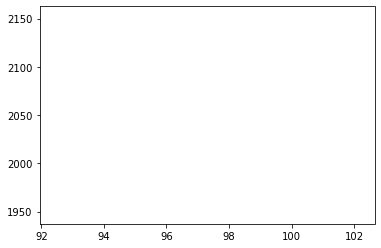

In [14]:
single_obs_vs_standard(si[si.batter == 425796])

In [15]:
# Well, I kinda did it.

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

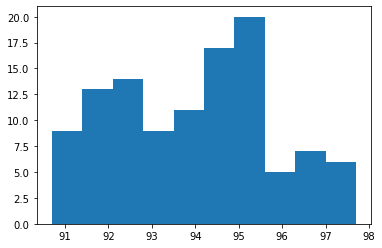

In [16]:
si.release_speed.tolist()
plt.hist(si.release_speed)

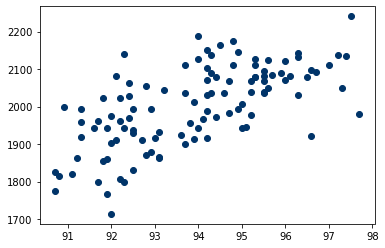

In [17]:
plt.scatter(x = si.release_speed
            ,y = si.release_spin_rate
            ,color = '#003469'
           )

(array([ 9., 13., 14.,  9., 11., 17., 20.,  5.,  7.,  6.]),
 array([90.7, 91.4, 92.1, 92.8, 93.5, 94.2, 94.9, 95.6, 96.3, 97. , 97.7]),
 <BarContainer object of 10 artists>)

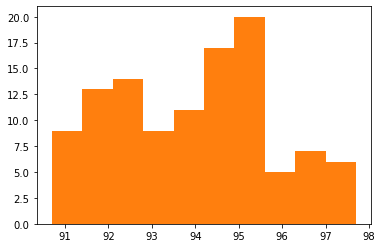

In [18]:
# string = "Zack Britton's Sinker"
# graph(x = si.release_speed.fillna(si.release_speed.mean)
#             ,y = si.release_spin_rate.fillna(si.release_spin_rate.mean)
#             ,colors = '#003469'
#       ,title = '{}'.format(string)
#       ,xlabel = 'Velo (mph)'
#       ,ylabel = 'Spin (rpm)'
#            )

# graph(
#     x = si.release_speed
#     ,y = si.release_spin_rate
#     ,title = "Zack Britton's Sinkers"
#     ,xlabel = 'Velo (mph)'
#     ,ylabel = 'Spin (rpm)'
#     ,colors = '#003469'
# )
#summarize(si.release_speed)

x = si.release_speed.fillna(si.release_speed.mean)
plt.hist(x)
plt.hist(si.release_speed)
# plt.axvline(x = x.mean(), color = '#000000') # Vertical line at median of x
# plt.axhline(y = y.mean(), color = '#000000') # Horizontal Line at median of y

# So I am Returning to my Matplotlib Tutorial Exercises

In [19]:
# fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# # Build a plot for the first cell in location (0,0) of the grid of subplots I just created
# axs[0,0].plot(x, np.sin(x))
# axs[0,0].set_title('Sine Wave')

# # Build a plot for the location 0,1 in the grid of subplots
# axs[0,1].plot(x, np.cos(x))
# axs[0,1].set_title('Cosine Wave')

# # Build a plot for the location 1,0 in the grid of subplots
# axs[1,0].plot(x, np.random.random(100))
# axs[1,0].set_title('Random Function')

# # Build a plot for the location of 1,1 in the grid of subplots
# axs[1,1].plot(x, np.log(x))
# axs[1,1].set_title('Log Function')
# axs[1,1].set_xlabel('TEST')

# fig.suptitle('Four Plots') # Title of my grid of subplots
# plt.tight_layout() 
# plt.show()

# # This looks awful
# plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# # arguments for that savefig function may be useful for final delivery of shit

# Alec Bohm vs Power Sinkers
Let's define a power sinker as 95+ SI

In [20]:
pos.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'
                                                          ,'game_pk' : 'nunique'
                                                         }).sort_values(by='game_pk',ascending=False).head(25)
bohm_id = 664761
bohm_pos = pos[pos.batter == bohm_id]
df = bohm_pos[(bohm_pos.pitch_type == 'SI')
              &(bohm_pos.release_speed >= 95)
             ]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2020,20,5,5,1,0.0,0.0,0.0,0.200,0.200,0.200,0.400,0.177
1,2021,75,26,16,6,0.0,3.0,7.0,0.261,0.346,0.261,0.607,0.283
2,2022,130,46,33,10,1.0,1.0,12.0,0.222,0.239,0.356,0.595,0.257
3,2023,158,40,31,11,0.0,1.0,7.0,0.289,0.325,0.316,0.641,0.287
4,2024,70,21,19,7,1.0,1.0,1.0,0.350,0.381,0.550,0.931,0.402


In [21]:
df = bohm_pos[bohm_pos.game_year == 2024]
results('pitch_type').sort_values(by='pitches',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
5,FF,472,131.0,91.0,39.0,4.0,12.0,26.0,0.331,0.397,0.525,0.922,0.400
11,SI,333,104.0,83.0,23.0,2.0,8.0,11.0,0.250,0.317,0.402,0.719,0.314
12,SL,274,77.0,61.0,25.0,2.0,4.0,11.0,0.352,0.390,0.563,0.953,0.407
4,FC,127,36.0,27.0,6.0,2.0,5.0,4.0,0.207,0.306,0.414,0.719,0.309
0,CH,124,31.0,28.0,7.0,0.0,1.0,2.0,0.233,0.258,0.267,0.525,0.234
13,ST,120,37.0,28.0,12.0,0.0,1.0,8.0,0.343,0.351,0.514,0.866,0.367
1,CU,68,16.0,16.0,4.0,1.0,0.0,0.0,0.250,0.250,0.562,0.812,0.342
7,FS,19,5.0,3.0,1.0,0.0,1.0,1.0,0.250,0.400,0.500,0.900,0.390
8,KC,8,2.0,0.0,0.0,0.0,1.0,1.0,0.000,0.500,0.000,0.500,0.346
9,KN,5,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000,NaN,NaN,0.723


In [22]:
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,454,129,108,31,4,9,12,0.258,0.310,0.433,0.743,0.324
1,R,1102,313,231,86,7,24,52,0.309,0.367,0.489,0.857,0.369


In [23]:
df = bohm_pos[(bohm_pos.p_throws == 'L')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
10,ST,15,4.0,4.0,2.0,0.0,0.0,0.0,0.500,0.500,0.750,1.250,0.536
3,FF,138,39.0,32.0,14.0,3.0,3.0,4.0,0.389,0.436,0.722,1.158,0.490
1,CU,25,6.0,6.0,2.0,0.0,0.0,0.0,0.333,0.333,0.667,1.000,0.420
9,SL,35,11.0,8.0,2.0,0.0,2.0,1.0,0.222,0.364,0.333,0.697,0.321
2,FC,35,11.0,8.0,1.0,1.0,1.0,2.0,0.100,0.182,0.400,0.582,0.250
8,SI,93,31.0,26.0,5.0,0.0,3.0,2.0,0.179,0.258,0.214,0.472,0.222
0,CH,102,26.0,24.0,5.0,0.0,0.0,2.0,0.192,0.192,0.231,0.423,0.185
6,KC,4,1.0,0.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
4,FO,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,FS,4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df = bohm_pos[(bohm_pos.p_throws == 'R')
              &(bohm_pos.game_year == 2024)
             ]
results('pitch_type').sort_values(by='ops',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,CH,22,5,4.0,2.0,0.0,1.0,0.0,0.500,0.600,0.500,1.100,0.492
10,SL,239,66,53.0,23.0,2.0,2.0,10.0,0.371,0.394,0.597,0.991,0.422
6,FS,15,5,3.0,1.0,0.0,1.0,1.0,0.250,0.400,0.500,0.900,0.390
9,SI,240,73,57.0,18.0,2.0,5.0,9.0,0.281,0.342,0.484,0.827,0.353
5,FF,334,92,59.0,25.0,1.0,9.0,22.0,0.305,0.380,0.439,0.819,0.361
11,ST,105,33,24.0,10.0,0.0,1.0,8.0,0.323,0.333,0.484,0.817,0.346
4,FC,92,25,19.0,5.0,1.0,4.0,2.0,0.263,0.360,0.421,0.781,0.335
1,CU,43,10,10.0,2.0,1.0,0.0,0.0,0.200,0.200,0.500,0.700,0.295
2,EP,2,1,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,FA,1,1,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000


# Should Marchan go down?
He will because it makes sense rosterwise I think. Phillies pitchers have better number pitching to Stubbs but the expected numbers point to a much more similar performance between Stubbs and Marchan. In fact, I think there are indicators that Marchan has been better.

In [25]:
catchers = pps[pps.game_year==2024].fielder_2.unique().tolist()
# Rob Thomson likes to ride the hot hand tho, so he will put Phillips right back out there
catchers
po2 = pos[pos.batter.isin(catchers)]
df = po2[po2.game_year == 2024]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Marchán, Rafael",195,56,44,15,3,3,8,0.294,0.339,0.549,0.888,0.377
1,"Realmuto, J.T.",958,248,165,57,7,15,64,0.249,0.302,0.384,0.687,0.302
2,"Stubbs, Garrett",547,138,85,24,1,14,36,0.197,0.290,0.238,0.528,0.248


In [26]:
df.groupby([
            'player_name'
    ,'batter'
           ]
           ,as_index=False
).agg({'launch_speed' : 'mean'
       ,'estimated_ba_using_speedangle' : 'mean'
       ,'hit_distance_sc' : 'mean'
      }).round(3)

,player_name,batter,launch_speed,estimated_ba_using_speedangle,hit_distance_sc
0,"Marchán, Rafael",665561,80.492,0.396,152.806
1,"Realmuto, J.T.",592663,83.324,0.346,151.276
2,"Stubbs, Garrett",596117,74.350,0.286,136.225


In [27]:
df = pps[pps.game_year==2024]
pps_by_catcher = results('fielder_2')
pps_by_catcher

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,592663,8086,2071,1379,420,46,151,520,0.222,0.284,0.344,0.628,0.279
1,596117,5045,1297,888,279,41,90,304,0.236,0.295,0.397,0.692,0.302
2,665561,2104,548,376,127,16,37,122,0.256,0.321,0.414,0.736,0.323


In [28]:
x = pps_by_catcher
x['share_pa'] = x.plate_apps/x.plate_apps.sum()
x['share_bip'] = x.bip/x.bip.sum()
x['hits_per_bip'] = x.hits/x.bip
x['share_hrs'] = x.hrs/x.hrs.sum()
x['share_bb'] = x.walks/x.walks.sum()
x['share_ks'] = x.strikeouts/x.strikeouts.sum()
shares = x[['fielder_2'
   ,'share_pa'
   ,'share_bip'
   ,'share_hrs'
   ,'share_bb'
   ,'share_ks'
  ]
 ].round(3)

In [29]:
catcher_ids = po2.groupby('player_name',as_index=False).agg({'batter' : 'max'})

Marchan is definitely hitting the ball better but the Phillies pitchers are throwing the ball better to Garrett Stubbs than they are to Rafael Marchan. There is going to be noise in those data, but I think there is truth to that narrative that guys feel more comfortable throwing to Stubbs.

Stubbs is not necessarily covering himself in glory behind the plate. When we look at the share of plate appearances he has caught relative to the share of home runs, walks, and strikeouts he has been behind the plate for.

In [30]:
shares.merge(catcher_ids,left_on='fielder_2',right_on='batter',suffixes = ('','_2'))[['player_name'
                                                                             ,'share_pa'
                                                                             ,'share_hrs'
                                                                             ,'share_bb'
                                                                             ,'share_ks']
                                                                            ]

,player_name,share_pa,share_hrs,share_bb,share_ks
0,"Realmuto, J.T.",0.529,0.447,0.543,0.550
1,"Stubbs, Garrett",0.331,0.398,0.324,0.321
2,"Marchán, Rafael",0.140,0.155,0.133,0.129


Some things to look at - who has pitched to Rafael Marchan? what opponents has he caught against? Do pitchers typically pitch worse to Marchan than they do to everyone else?

## How do guys typically throw to Marchan compared to the other catchers in their career.

In [31]:
marchan_id = 665561
# quick check -- passed
# pos[pos.batter==marchan_id].player_name.unique() 
marchy = pps[pps.fielder_2 == marchan_id]
marchy.groupby('player_name'
               ,as_index=False
              ).agg({'des' : 'count'
                     ,'game_pk' : 'nunique'
                    }).sort_values(by='des',ascending=False)
df = marchy
res_marchy = results('player_name').sort_values(by='pitches',ascending=False)

In [32]:
non_marchy = pd.concat([pps[(pps.player_name.isin(df.player_name))&(pps.fielder_2 != marchan_id)]
                        ,nphl[nphl.player_name.isin(df.player_name)]
                       ])
df = non_marchy
res_non_marchy = results('player_name')

In [33]:
x = res_marchy
y = res_non_marchy

len(x),len(y)

(39, 39)

In [34]:
z = x.merge(y,on='player_name',suffixes = ('_x','_y'))
z['diff_ops'] = z.ops_x - z.ops_y
z['diff_ba'] = z.ba_x - z.ba_y
z[z.pitches_x>=50][['player_name','pitches_x','diff_ops','diff_ba']].sort_values(by='diff_ops')

,player_name,pitches_x,diff_ops,diff_ba
8,"Howard, Spencer",134,-0.347,-0.167
29,"Rosso, Ramón",50,-0.316,-0.061
17,"Medina, Adonis",84,-0.258,-0.110
10,"Soto, Gregory",132,-0.254,-0.126
11,"Neris, Hector",124,-0.252,-0.093
24,"Hammer, JD",59,-0.237,-0.029
23,"Hoffman, Jeff",67,-0.167,-0.086
7,"Domínguez, Seranthony",145,-0.112,-0.016
5,"Gibson, Kyle",175,-0.075,-0.013
1,"Wheeler, Zack",485,-0.058,-0.031


### Cris Sanchez pitches well to Stubbs

In [35]:
df = pps[pps.player_name=='Sánchez, Cristopher']
results('fielder_2')

,fielder_2,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,592663,2600,694,492,165,16.0,48,149,0.258,0.311,0.388,0.699,0.306
1,595284,38,10,7,2,0.0,1,2,0.222,0.300,0.222,0.522,0.245
2,596117,1307,365,267,76,9.0,17,77,0.223,0.266,0.355,0.621,0.271
3,665561,176,49,37,16,0.0,4,8,0.364,0.408,0.477,0.885,0.382


# LAD (H) 79-711
Big Series. Welcome back Schwarber and Harper. Let's take 2 of 3.

## Game 1: Miller vs Wheeler

In [36]:
# Bryce Harper was unreal in June. .714 SLG!

In [37]:
po24 = pos[pos.game_year==2024]
po24.groupby('player_name',as_index=False).agg({'des':'count','batter':'max'})
harper_id=547180
df = bryce = po24[po24.batter==harper_id]
df['date'] = pd.to_datetime(df.game_date)
df['month'] = df.date.dt.month
results('month')

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,33,8,3,0.0,0.0,2,3,0.000,0.250,0.000,0.250,0.173
1,4,433,108,71,23.0,6.0,13,24,0.245,0.333,0.489,0.823,0.354
2,5,428,110,70,30.0,7.0,13,27,0.312,0.391,0.583,0.974,0.415
3,6,388,102,73,34.0,7.0,11,18,0.374,0.441,0.714,1.155,0.487
4,7,259,64,46,10.0,4.0,7,11,0.175,0.266,0.421,0.687,0.299


## How do the Phils match up against a guy like Bobby Miller?

In [38]:
bm = bobby = pd.read_csv('bobby_miller.csv')
pitch_mix(bm)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,797,98.695107,2335.967378,8.184442,32.3
1,CU,Curveball,439,80.442597,2782.381279,10.027335,17.8
3,SI,Sinker,424,98.564623,2296.242925,7.929245,17.2
0,CH,Changeup,407,87.705651,2284.766585,10.393120,16.5
4,SL,Slider,385,89.785974,2490.885117,10.405195,15.6
5,ST,Sweeper,14,85.285714,2695.071429,12.142857,0.6


In [39]:
pitch_mix_by_group(bm,'game_year')

,game_year,count,release_speed,release_spin_rate,zone,usage
0,2023,2013,92.234,2441.304,9.172,81.6
1,2024,453,91.738,2359.106,9.338,18.4


In [40]:
# Casty is getting a healthy diet of sliders

In [41]:
bm23 = bm[bm.game_year==2023]
pitch_mix(bm23)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,596,99.050168,2340.661074,8.162752,29.6
3,SI,Sinker,377,98.752255,2296.673740,7.755968,18.7
1,CU,Curveball,372,80.626075,2809.528302,10.099462,18.5
4,SL,Slider,333,89.822222,2510.504532,10.324324,16.5
0,CH,Changeup,321,88.177882,2290.024922,10.308411,15.9
5,ST,Sweeper,14,85.285714,2695.071429,12.142857,0.7


In [42]:
bm24 = bm[bm.game_year==2024]
pitch_mix(bm24)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,FF,4-Seam Fastball,201,97.642289,2322.049751,8.248756,44.4
0,CH,Changeup,86,85.943023,2265.139535,10.709302,19.0
1,CU,Curveball,67,79.423881,2632.059701,9.626866,14.8
4,SL,Slider,52,89.553846,2366.000000,10.923077,11.5
3,SI,Sinker,47,97.059574,2292.787234,9.319149,10.4


In [43]:
# Rafael Marchan!!!

In [44]:
def risp(df):
    ks = df[((df.on_2b.isna==True) & (df.on_3b.isna==False))
            |((df.on_2b.isna==False) & (df.on_3b.isna==True))
            |((df.on_2b.isna==False) & (df.on_3b.isna==False))
           ]
    return ks

In [45]:
# this RISP function does not work ^^^^^^^^

In [46]:
# John Kruk is certain that Bryson Stott has seen more breaking balls this year than ever in his career

In [47]:
df = stott=pos[pos.player_name=='Stott, Bryson']
pm22 = pitch_mix(df[df.game_year==2022])
pm23 = pitch_mix(df[df.game_year==2023])
pm24 = pitch_mix(df[df.game_year==2024])
pm22

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
5,FF,4-Seam Fastball,879,94.216837,2281.964733,7.646189,41.6
8,SI,Sinker,335,93.240896,2135.704478,8.516418,15.9
9,SL,Slider,240,84.038750,2431.495833,9.125000,11.4
0,CH,Changeup,225,87.039111,1731.524444,10.404444,10.7
1,CU,Curveball,165,78.401212,2616.921212,9.581818,7.8
4,FC,Cutter,163,89.100613,2352.938650,8.220859,7.7
6,FS,Split-Finger,39,85.674359,1230.051282,9.743590,1.8
7,KC,Knuckle Curve,30,81.833333,2551.666667,9.133333,1.4
10,ST,Sweeper,26,81.019231,2691.076923,8.307692,1.2
11,SV,Slurve,6,82.300000,2385.666667,7.333333,0.3


In [48]:
bb = breaking_balls = ['SL','CU','KC','ST','SV','CS']
dfbb = pd.DataFrame()
count = 0
for pm in [pm22,pm23,pm24]:
    dfbb = pd.concat([dfbb,pm[pm.pitch_type.isin(bb)]])
    count+=1
    print(count)

1
2
3


In [49]:
dfbb

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
9,SL,Slider,240,84.038750,2431.495833,9.125000,11.4
1,CU,Curveball,165,78.401212,2616.921212,9.581818,7.8
7,KC,Knuckle Curve,30,81.833333,2551.666667,9.133333,1.4
10,ST,Sweeper,26,81.019231,2691.076923,8.307692,1.2
11,SV,Slurve,6,82.300000,2385.666667,7.333333,0.3
12,SL,Slider,296,84.448311,2381.651877,9.628378,10.3
2,CU,Curveball,234,80.107265,2579.286325,10.051282,8.1
13,ST,Sweeper,66,81.153030,2568.075758,10.575758,2.3
9,KC,Knuckle Curve,49,82.255102,2620.653061,10.489796,1.7
14,SV,Slurve,6,81.900000,2721.333333,10.166667,0.2


## Game 2: Stone vs Sanchez
Cristopher SAnchez is the man, man. Vargas has to be benched in this game.

In [50]:
whit = pd.concat([nphl[nphl.player_name=='Merrifield, Whit'], pos[pos.player_name=='Merrifield, Whit']])
#whit[

In [51]:
# Cris Sanchez's fucking average launch angle is 0.6 degrees!??!?!??!?!?!
pp24 = pps[pps.game_year==2024]
pp24[pp24.p_throws=='L'].groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,player_name,pitcher,des
4,"Suárez, Ranger",624133,1780
5,"Sánchez, Cristopher",650911,1750
1,"Alvarado, José",621237,716
2,"Soto, Gregory",642397,649
3,"Strahm, Matt",621381,610
0,"Allard, Kolby",663465,63


In [52]:
cris = 650911
cris = pp24[pp24.pitcher==650911]
cris.launch_angle.mean()
cris.groupby('stand',as_index=False).agg({'estimated_ba_using_speedangle' : 'mean'
                                          ,'launch_speed' : 'mean'
                                          ,'launch_angle' : 'mean'
                                          ,'type' : 'nunique'
                                         })

,stand,estimated_ba_using_speedangle,launch_speed,launch_angle,type
0,L,0.284127,78.860345,-10.136752,3
1,R,0.343543,83.798428,6.982353,3


In [53]:
abs(cris.launch_angle).mean()

26.464114832535884

<AxesSubplot:>

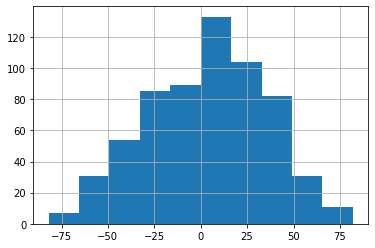

In [54]:
cris.launch_angle.hist()

In [55]:
stott.groupby('game_year',as_index=False).agg({'launch_speed' : ['mean','std']
                                              ,'launch_angle' : ['mean','std']
                                              }).round(1)

game_year launch_speed       launch_angle      
                    mean   std         mean   std
0      2022         81.3  13.8         21.2  31.5
1      2023         82.4  12.9         18.6  29.6
2      2024         80.8  14.3         20.3  31.3

In [56]:
stott['month'] = pd.to_datetime(stott.game_date).dt.month

In [57]:
mus = stott.groupby(['game_year','month'],as_index=False).agg({'launch_speed' : ['mean','std']
                                                         ,'launch_angle' : ['mean','std']
                                                         ,'estimated_ba_using_speedangle' : ['mean','std']
                                                         ,'release_speed' : ['mean','std']
                                                         ,'release_spin_rate' : ['mean','std']
                                                        })
mus

game_year month launch_speed            launch_angle             \
                           mean        std         mean        std   
0       2022     4    79.475000  16.825968    16.525000  31.849798   
1       2022     5    76.631429  13.865739    24.628571  31.376245   
2       2022     6    83.664220  12.741987    23.761468  28.464045   
3       2022     7    83.595333  12.945224    19.847682  34.026411   
4       2022     8    81.690071  13.817480    20.539007  30.078117   
5       2022     9    79.441803  14.352446    20.520325  31.205650   
6       2022    10    81.250526  13.869397    18.347368  33.715571   
7       2022    11    77.646667   7.456528    41.466667  22.570102   
8       2023     3    82.820000   8.525081    11.800000  37.412565   
9       2023     4    81.240278  13.029905    19.393519  31.132093   
10      2023     5    82.469136  13.050105    20.895062  28.101548   
11      2023     6    82.089928  11.656523    17.482014  29.854321   
12      2023     7    84.292241  12.049248    13.853448  30.102796   
13      2023     8    84.605590  13.672382    19.515528  27.794358   
14      2023     9    80.297386  13.585722    18.686275  30.496219   
15      2023    10    82.560870  11.925334    19.840580  28.053323   
16      2024     3    84.353846   9.272236    24.461538  24.329733   
17      2024     4    81.670093  15.293285    23.439252  33.310483   
18      2024     5    80.704828  13.811319    21.551724  31.508582   
19      2024     6    79.952518  15.683215    16.330935  27.779773   
20      2024     7    80.624771  12.435487    20.018349  33.788553   

   estimated_ba_using_speedangle           release_speed            \
                            mean       std          mean       std   
0                       0.292500  0.271209     90.552381  5.493381   
1                       0.193464  0.248780     88.807282  6.177615   
2                       0.270015  0.270004     89.693521  5.794132   
3                       0.296169  0.277659     88.835695  7.852361   
4                       0.304338  0.252491     89.651358  5.552555   
5                       0.305857  0.266331     91.170739  5.326558   
6                       0.361205  0.272719     90.804906  5.823471   
7                       0.114286  0.115612     91.800000  5.339128   
8                       0.090000  0.074953     95.794444  4.406876   
9                       0.337031  0.292792     89.768738  6.115582   
10                      0.308965  0.276252     89.938261  5.439236   
11                      0.274425  0.271293     89.780097  5.927136   
12                      0.354113  0.304583     89.868142  6.324199   
13                      0.334977  0.241571     89.801770  6.748303   
14                      0.251216  0.283031     89.856713  5.759749   
15                      0.306595  0.317644     90.759072  5.477641   
16                      0.425625  0.352492     89.094286  6.214165   
17                      0.262385  0.256603     89.415489  6.309606   
18                      0.293373  0.282029     88.953364  5.917438   
19                      0.348435  0.296531     89.314615  6.180142   
20                      0.301158  0.319975     89.479288  6.136401   

   release_spin_rate              
                mean         std  
0        2179.706349  372.099021  
1        2286.155340  409.655638  
2        2212.002817  329.548240  
3        2249.174387  303.757196  
4        2219.459259  338.980426  
5        2175.002841  347.360839  
6        2328.252830  353.000097  
7        2398.527778  260.676426  
8        2439.277778  288.833110  
9        2249.838403  301.475493  
10       2261.177243  337.220465  
11       2222.116505  340.771268  
12       2231.890533  368.464763  
13       2186.785398  298.703192  
14       2232.826698  367.247666  
15       2348.700422  314.469662  
16       2358.742857  249.401677  
17       2252.057221  354.976278  
18       2191.993039  357.697199  
19       2200.048913  422.273144  
20       22

In [58]:
mus.sort_values(by=(('game_year')
                    #,('launch_speed','mean')
                    #,('release_speed','mean')
                   ),ascending=False).round(1)

game_year month launch_speed       launch_angle        \
                           mean   std         mean   std   
20      2024     7         80.6  12.4         20.0  33.8   
19      2024     6         80.0  15.7         16.3  27.8   
18      2024     5         80.7  13.8         21.6  31.5   
17      2024     4         81.7  15.3         23.4  33.3   
16      2024     3         84.4   9.3         24.5  24.3   
11      2023     6         82.1  11.7         17.5  29.9   
15      2023    10         82.6  11.9         19.8  28.1   
14      2023     9         80.3  13.6         18.7  30.5   
13      2023     8         84.6  13.7         19.5  27.8   
12      2023     7         84.3  12.0         13.9  30.1   
10      2023     5         82.5  13.1         20.9  28.1   
9       2023     4         81.2  13.0         19.4  31.1   
8       2023     3         82.8   8.5         11.8  37.4   
1       2022     5         76.6  13.9         24.6  31.4   
7       2022    11         77.6   7.5         41.5  22.6   
6       2022    10         81.3  13.9         18.3  33.7   
5       2022     9         79.4  14.4         20.5  31.2   
4       2022     8         81.7  13.8         20.5  30.1   
3       2022     7         83.6  12.9         19.8  34.0   
2       2022     6         83.7  12.7         23.8  28.5   
0       2022     4         79.5  16.8         16.5  31.8   

   estimated_ba_using_speedangle      release_speed      release_spin_rate  \
                            mean  std          mean  std              mean   
20                           0.3  0.3          89.5  6.1            2265.9   
19                           0.3  0.3          89.3  6.2            2200.0   
18                           0.3  0.3          89.0  5.9            2192.0   
17                           0.3  0.3          89.4  6.3            2252.1   
16                           0.4  0.4          89.1  6.2            2358.7   
11                           0.3  0.3          89.8  5.9            2222.1   
15                           0.3  0.3          90.8  5.5            2348.7   
14                           0.3  0.3          89.9  5.8            2232.8   
13                           0.3  0.2          89.8  6.7            2186.8   
12                           0.4  0.3          89.9  6.3            2231.9   
10                           0.3  0.3          89.9  5.4            2261.2   
9                            0.3  0.3          89.8  6.1            2249.8   
8                            0.1  0.1          95.8  4.4            2439.3   
1                            0.2  0.2          88.8  6.2            2286.2   
7                            0.1  0.1          91.8  5.3            2398.5   
6                            0.4  0.3          90.8  5.8            2328.3   
5                            0.3  0.3          91.2  5.3            2175.0   
4                            0.3  0.3          89.7  5.6            2219.5   
3                            0.3  0.3          88.8  7.9            2249.2   
2                            0.3  0.3          89.7  5.8            2212.0   
0                            0.3  0.3          90.6  5.5            2179.7   

           
      std  
20  363.8  
19  422.3  
18  357.7  
17  355.0  
16  249.4  
11  340.8  
15  314.5  
14  367.2  
13  298.7  
12  368.5  
10  337.2  
9   301.5  
8   288.8  
1   409.7  
7   260.7  
6   353.0  
5   347.4  
4   339.0  
3   303.8  
2   329.5  
0   372.1

In [59]:
stott['monthyear'] = stott.game_year
df = stott
results('month').sort_values(by='ops',ascending=False)

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,53,14,10,5.0,0.0,1,3,0.385,0.429,0.462,0.890,0.392
5,8,857,211,165,53.0,6.0,14,28,0.276,0.332,0.458,0.790,0.340
7,10,502,116,76,27.0,2.0,12,27,0.262,0.336,0.408,0.744,0.326
4,7,1015,257,206,64.0,7.0,17,33,0.270,0.319,0.414,0.733,0.319
3,6,1157,281,209,66.0,6.0,23,47,0.260,0.320,0.386,0.706,0.310
1,4,1025,247,183,58.0,5.0,15,48,0.253,0.300,0.367,0.666,0.292
2,5,1097,260,188,52.0,5.0,26,42,0.231,0.312,0.338,0.649,0.289
6,9,784,193,130,36.0,2.0,13,45,0.206,0.264,0.274,0.539,0.242
8,11,36,11,7,0.0,0.0,1,3,0.000,0.091,0.000,0.091,0.063


In [60]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2022,2112,522,372,106,10,43,101,0.223,0.287,0.342,0.630,0.280
1,2023,2881,691,527,175,16,41,114,0.276,0.323,0.411,0.733,0.317
2,2024,1533,377,275,80,7,38,61,0.243,0.321,0.356,0.677,0.301


In [61]:
stott[stott.events=='home_run'
     ][[
    'game_date','pitch_type','home_team','away_team','hit_distance_sc','launch_speed','launch_angle'
]].sort_values(by='hit_distance_sc',ascending=False)

,game_date,pitch_type,home_team,away_team,hit_distance_sc,launch_speed,launch_angle
206232,2024-07-09,CU,PHI,LAD,432.0,105.3,28.0
180539,2023-09-12,FF,PHI,ATL,424.0,101.0,30.0
191964,2023-06-15,FF,AZ,PHI,418.0,102.7,29.0
204486,2024-07-26,SI,PHI,CLE,416.0,107.7,25.0
162276,2022-07-13,KC,TOR,PHI,415.0,102.8,27.0
203818,2023-10-04,FF,PHI,MIA,412.0,102.4,28.0
155976,2022-09-03,SL,SF,PHI,412.0,106.2,29.0
162410,2022-07-12,SI,TOR,PHI,403.0,105.9,23.0
217854,2024-04-11,SI,PHI,PIT,402.0,102.3,27.0
192310,2023-06-13,CU,AZ,PHI,401.0,98.8,29.0


In [62]:
stott.game_date.max()

'2024-07-29'

In [63]:
pos.game_date.max()

'2024-07-29'

In [64]:
df=pd.read_csv('po24.csv')
df.game_date.max()

'2024-07-29'

## Game 3: Knack vs Nola
Big sweep against the Dodgers. Nola pitches well. Turner and Marsh hit home runs. Big game for Marsh. Bullpen gets it done.

# OAK (H) 712-714
## Game 1: Harris vs Suarez

## Game 2: Spence vs Phillips

## Game 3: Estes vs Bullpen/Mercado

# 162 Game Pace

In [65]:
gms = po24.groupby(['player_name','batter'],as_index=False).agg({'game_pk' : 'nunique'})
df = po24
res = results('player_name')
x = res.merge(gms,on='player_name')
x['bip/gm'] = x.bip/x.game_pk
x['hits/gm'] = x.hits/x.game_pk
x['hrs/gm'] = x.hrs/x.game_pk
x['walks/gm'] = x.walks/x.game_pk
x['strikeouts/gm'] = x.strikeouts/x.game_pk

In [66]:
for col in [c for c in x.columns if '/gm' in c]:
    x['{}162'.format(col)] = x[col]*162

In [67]:
p162 = x[['player_name','bip/gm162','hits/gm162','hrs/gm162','walks/gm162','strikeouts/gm162']].round(0)

In [68]:
z = x[['player_name','ba','obp','slg','ops','woba']].merge(p162,on='player_name')

In [69]:
z.sort_values(by='ops',ascending=False)

,player_name,ba,obp,slg,ops,woba,bip/gm162,hits/gm162,hrs/gm162,walks/gm162,strikeouts/gm162
4,"Harper, Bryce",0.282,0.365,0.555,0.920,0.393,468.0,173.0,43.0,82.0,148.0
6,"Marchán, Rafael",0.294,0.339,0.549,0.888,0.377,475.0,162.0,32.0,32.0,86.0
16,"Turner, Trea",0.319,0.368,0.507,0.876,0.380,534.0,218.0,31.0,41.0,143.0
12,"Schwarber, Kyle",0.247,0.373,0.463,0.836,0.366,413.0,150.0,38.0,123.0,205.0
0,"Bohm, Alec",0.294,0.351,0.472,0.823,0.356,528.0,182.0,17.0,51.0,100.0
13,"Sosa, Edmundo",0.275,0.332,0.451,0.782,0.340,371.0,137.0,14.0,27.0,129.0
2,"Clemens, Kody",0.242,0.277,0.500,0.777,0.330,317.0,101.0,20.0,20.0,101.0
7,"Marsh, Brandon",0.254,0.328,0.432,0.760,0.331,328.0,129.0,21.0,60.0,187.0
1,"Castellanos, Nick",0.241,0.292,0.410,0.702,0.306,478.0,150.0,23.0,40.0,147.0
10,"Realmuto, J.T.",0.249,0.302,0.384,0.687,0.302,469.0,162.0,20.0,43.0,182.0


In [70]:
df = pp24
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Allard, Kolby",63,17,16,6,1.0,0.0,1.0,0.353,0.353,0.529,0.882,0.382
1,"Alvarado, José",716,175,113,34,4.0,16.0,45.0,0.217,0.291,0.325,0.616,0.277
2,"Brogdon, Connor",76,14,5,3,2.0,6.0,3.0,0.375,0.643,1.250,1.893,0.681
3,"Domínguez, Seranthony",653,157,103,32,6.0,12.0,40.0,0.224,0.293,0.406,0.699,0.306
4,"Hoffman, Jeff",672,175,101,27,2.0,12.0,60.0,0.168,0.229,0.261,0.489,0.221
5,"Kerkering, Orion",694,161,101,33,0.0,9.0,44.0,0.228,0.298,0.276,0.574,0.263
6,"Marte, Yunior",354,93,66,23,3.0,8.0,19.0,0.274,0.333,0.429,0.762,0.332
7,"Mercado, Michael",227,54,38,12,6.0,8.0,8.0,0.261,0.370,0.696,1.066,0.444
8,"Nelson, Nick",54,15,10,6,0.0,0.0,5.0,0.400,0.400,0.533,0.933,0.402
9,"Nola, Aaron",2011,522,363,108,18.0,31.0,125.0,0.222,0.270,0.388,0.658,0.287


In [71]:
df = trea = pd.concat([nphl[nphl.player_name=='Turner, Trea'],pos[pos.player_name=='Turner, Trea']])
results('pitch_type').sort_values(by='pitches',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
6,FF,6065,1527.0,1104.0,416.0,74.0,140.0,270.0,0.304,0.371,0.552,0.924,0.390
14,SL,3813,950.0,658.0,235.0,27.0,48.0,241.0,0.263,0.301,0.412,0.713,0.307
13,SI,3467,953.0,768.0,290.0,35.0,74.0,101.0,0.333,0.388,0.536,0.924,0.394
0,CH,1910,536.0,406.0,144.0,13.0,30.0,94.0,0.289,0.334,0.417,0.751,0.326
2,CU,1483,365.0,261.0,102.0,7.0,12.0,82.0,0.295,0.329,0.425,0.754,0.326
5,FC,1290,311.0,236.0,87.0,8.0,22.0,52.0,0.302,0.350,0.472,0.823,0.354
9,KC,529,128.0,83.0,26.0,3.0,2.0,42.0,0.208,0.227,0.312,0.539,0.233
15,ST,350,86.0,55.0,22.0,1.0,3.0,26.0,0.278,0.314,0.405,0.719,0.311
8,FS,291,94.0,65.0,23.0,0.0,1.0,26.0,0.256,0.277,0.333,0.610,0.265
16,SV,33,9.0,3.0,2.0,0.0,2.0,4.0,0.286,0.444,0.429,0.873,0.392


# Who Hits Velo the Best?
It would be interesting to look at the difference between this and normal ala Thinking Basketball. <br>
Harper, Bohm, Marsh, and Schwarber. Trea is a little below average. <br>
Stott, Casty, and especially JT really struggle.

In [72]:
df = po24[po24.release_speed >= 95]
results('player_name').sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
6,"Marchán, Rafael",39,16.0,14.0,6.0,1.0,0.0,2.0,0.375,0.375,0.750,1.125,0.476
15,"Stubbs, Garrett",68,21.0,11.0,4.0,1.0,5.0,4.0,0.267,0.476,0.533,1.010,0.441
2,"Clemens, Kody",53,17.0,9.0,4.0,1.0,2.0,6.0,0.267,0.353,0.600,0.953,0.403
4,"Harper, Bryce",226,61.0,35.0,13.0,4.0,10.0,16.0,0.255,0.377,0.569,0.946,0.404
7,"Marsh, Brandon",235,58.0,28.0,14.0,3.0,6.0,23.0,0.275,0.345,0.529,0.874,0.372
0,"Bohm, Alec",299,88.0,58.0,25.0,2.0,8.0,21.0,0.321,0.386,0.474,0.861,0.375
12,"Schwarber, Kyle",253,68.0,35.0,13.0,2.0,15.0,18.0,0.260,0.412,0.440,0.852,0.373
16,"Turner, Trea",203,64.0,50.0,18.0,2.0,2.0,11.0,0.295,0.328,0.443,0.771,0.336
13,"Sosa, Edmundo",102,18.0,12.0,3.0,1.0,2.0,3.0,0.200,0.333,0.400,0.733,0.330
11,"Rojas, Johan",144,43.0,28.0,10.0,0.0,2.0,12.0,0.250,0.302,0.350,0.652,0.289


In [73]:
jt = pd.concat([nphl[nphl.player_name == 'Realmuto, J.T.'], pos[pos.player_name == 'Realmuto, J.T.']])
df = jt[jt.release_speed >= 95]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,213,56,43,11,1.0,2,9,0.216,0.268,0.275,0.542,0.244
1,2016,291,72,51,23,2.0,8,12,0.365,0.444,0.492,0.937,0.409
2,2017,307,81,60,18,0.0,4,17,0.237,0.272,0.329,0.601,0.259
3,2018,269,62,43,11,1.0,8,11,0.204,0.306,0.278,0.584,0.270
4,2019,286,76,56,20,5.0,1,19,0.274,0.276,0.548,0.824,0.331
5,2020,90,22,12,4,0.0,3,7,0.211,0.318,0.263,0.581,0.272
6,2021,344,101,52,18,5.0,9,39,0.200,0.277,0.411,0.688,0.296
7,2022,421,108,68,27,5.0,8,32,0.270,0.324,0.470,0.794,0.344
8,2023,399,114,75,26,1.0,4,32,0.243,0.281,0.383,0.664,0.286
9,2024,169,48,25,3,0.0,7,16,0.073,0.208,0.073,0.282,0.156


# Who is Hitting the ball the furthest and hardest?
Per Ball in Play: Marsh, JT, Harper <br>
In sum: well the guys who have put the most balls in play, Bohm, Casty, Stott.

In [74]:
bb = po24.groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                      ,'launch_angle' : 'mean'
                                                      ,'hit_distance_sc' : 'sum'
                                                     })
o = res.merge(bb,on='player_name')
o.sort_values(by='launch_speed',ascending=False)
o['ev/bip'] = o.launch_speed/o.bip
o['dist/bip'] = o.hit_distance_sc/o.bip
o[['player_name','bip','ops','launch_speed','launch_angle','hit_distance_sc','ev/bip','dist/bip']].sort_values(by='bip',ascending=False).round(3)

,player_name,bip,ops,launch_speed,launch_angle,hit_distance_sc,ev/bip,dist/bip
0,"Bohm, Alec",339,0.823,47403.4,17.989,91800.0,139.833,270.796
1,"Castellanos, Nick",313,0.702,48947.5,14.945,94069.0,156.382,300.540
14,"Stott, Bryson",275,0.677,41439.0,20.279,82837.0,150.687,301.225
4,"Harper, Bryce",263,0.920,43645.2,16.916,86456.0,165.951,328.730
12,"Schwarber, Kyle",242,0.836,38394.3,15.381,67927.0,158.654,280.690
16,"Turner, Trea",221,0.876,35025.1,15.378,64005.0,158.485,289.615
11,"Rojas, Johan",194,0.559,25528.2,10.484,39889.0,131.589,205.613
7,"Marsh, Brandon",170,0.760,29752.2,15.808,59500.0,175.013,350.000
10,"Realmuto, J.T.",165,0.687,27746.9,16.746,50375.0,168.163,305.303
8,"Merrifield, Whit",138,0.567,18902.9,17.565,36405.0,136.978,263.804


In [75]:
po24[po24.type=='X'].groupby('events',as_index=False).agg({'des':'count'})
hits = po24[po24.events.isin(['double','home_run','single','triple'])].groupby('player_name',as_index=False).agg({'launch_speed' : 'sum'
                                                                                                           ,'des' : 'count'
                                                                                                                  ,'estimated_ba_using_speedangle' : 'mean'
                                                                                                           })
hits['ev'] = hits.launch_speed/hits.des
hits.sort_values(by='ev',ascending=False).round(3)

,player_name,launch_speed,des,estimated_ba_using_speedangle,ev
12,"Schwarber, Kyle",8840.3,88,0.667,100.458
9,"Pache, Cristian",2063.7,21,0.535,98.271
2,"Clemens, Kody",1465.2,15,0.546,97.680
7,"Marsh, Brandon",6468.2,67,0.627,96.540
4,"Harper, Bryce",9218.7,97,0.617,95.038
0,"Bohm, Alec",11087.0,117,0.610,94.761
3,"Dahl, David",1136.9,12,0.654,94.742
16,"Turner, Trea",8437.1,90,0.519,93.746
10,"Realmuto, J.T.",5291.3,57,0.586,92.830
1,"Castellanos, Nick",9058.9,98,0.621,92.438


# All Star Break Recap

In [76]:
# sure

# HBP by Team

In [77]:
pps.columns.tolist()

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [78]:
# # This creates a column Team in the dataframe, df. The column is defined based off n other columns that already exist in the dataframe: [inning_topbot, home_team, and away_team]
# df = pps
# df['Team'] = '' # Initialize column
# for i in range(len(df)): # loop through a range of indexs that represent the length of the df 
#     if df.inning_topbot.iloc[i] == 'Top':
#         df['Team'].iloc[i] = df.away_team.iloc[i]
#     else:
#         df['Team'].iloc[i] = df.home_team.iloc[i]
# #pps.groupby('inning_topbot',as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})  

In [79]:
# Chat GPT solution, significantly faster but there is a bug!:
def determine_team(row):
    if row['inning_topbot'] == 'Bot':
        return row['away_team']
    else:
        return row['home_team']

In [80]:
df = pps
df['Team_gpt'] = df.apply(determine_team,axis=1) # Ok it took slightly longer since the true pps was a little longer, but still quicker than me right!

In [81]:
# group = ['game_pk'
#          ,'home_team'
#          ,'away_team'
#          ,'Team'
#         ]

# all_dfs = pd.DataFrame()
# n=0
# for df in [src, tgt]:
#     n+=1
#     x = df.groupby(group).agg({'Team' : 'nunique'
#             ,'game_date' : 'nunique'
#            })
#     x['test'] = n 
#     all_dfs = pd.concat([all_dfs,x])
#     print(n)

# #src = pps.groupby(group,as_index=False).agg({'game_pk' : 'max'
# #tgt = df.Team_gpt

In [82]:
# Meanwhile it appears team_gpt has simply identified the Philadelphia Phillies as the pitching team, which jokes on them is actually also a useful component!
df.groupby('Team_gpt',as_index=False).agg({'des' : 'count'
                                           ,'game_pk' : 'nunique'
                                           ,'game_date' : 'max'
                                          })

,Team_gpt,des,game_pk,game_date
0,PHI,218311,1492,2024-07-29


In [83]:
# So my ChatGPT output was a bug. Nice. Well it ying'd my yang (YA FEEL ME!)

Should Alec Bohm be swinging for dingers? No that is not his best approach. <br>
But it is Trea Turner's best approach. Let's look at the their home_run rate in the career and hard-hit career <br>
How many fucking home runs has Alec Bohm hit in his career!?!?!?!?!

In [84]:
df = bohm = pos[pos.player_name=='Bohm, Alec']
df = bohm[bohm.events=='home_run']
group = ['player_name','batter','game_year','game_type']
df.groupby(group,as_index=False).agg({'des' : 'count'})

,player_name,batter,game_year,game_type,des
0,"Bohm, Alec",664761,2020,R,4
1,"Bohm, Alec",664761,2021,R,7
2,"Bohm, Alec",664761,2022,R,13
3,"Bohm, Alec",664761,2022,W,1
4,"Bohm, Alec",664761,2023,L,1
5,"Bohm, Alec",664761,2023,R,20
6,"Bohm, Alec",664761,2024,R,11


In [85]:
def hrs(df):
    #df = hrs = pos[pos.events=='home_run']
    #x[
    x = df.groupby(['player_name','batter']).agg({'des' : 'count'
                                              ,'hit_distance_sc' : ['max', 'sum', 'mean']
                                              ,'launch_speed' : ['max','sum','mean']
                                              ,'launch_angle' : 'mean'
                                             })
    #x[x.player_name=='Bohm, Alec']
    x.columns.tolist()
    x.sort_values(by=('hit_distance_sc', 'max'),ascending=False).head(10).round(1)

    gpd = df.groupby(['player_name','game_pk','at_bat_number','events','inning','pitch_number']
               ,as_index=False).agg({'launch_speed' : 'max'
                                     ,'launch_angle' : 'max'
                                     ,'hit_distance_sc' : 'max'
                                    })#.sort_values(by='launch_speed',ascending=False).head(10)
    return gpd

In [86]:
hrs

<function __main__.hrs(df)>

In [87]:
df = hrs(po24)
df[df.events=='home_run'].sort_values(by='launch_angle')

,player_name,game_pk,at_bat_number,events,inning,pitch_number,launch_speed,launch_angle,hit_distance_sc
92,"Bohm, Alec",745555,8,home_run,1,1,106.8,19.0,427.0
2867,"Schwarber, Kyle",745602,6,home_run,1,2,114.4,19.0,382.0
1275,"Harper, Bryce",745598,27,home_run,4,1,103.3,19.0,367.0
4001,"Turner, Trea",746860,19,home_run,3,1,108.5,20.0,422.0
2643,"Schwarber, Kyle",745550,21,home_run,3,5,110.1,20.0,404.0
...,...,...,...,...,...,...,...,...,...
2604,"Schwarber, Kyle",745424,1,home_run,1,4,107.3,38.0,379.0
147,"Bohm, Alec",745567,40,home_run,5,1,95.2,38.0,357.0
1225,"Harper, Bryce",745586,38,home_run,4,3,95.4,38.0,360.0
2147,"Realmuto, J.T.",745576,26,home_run,3,1,106.3,39.0,387.0


In [88]:
ks = pos.merge(df[df.events=='home_run'],left_on=['game_pk','at_bat_number','pitch_number'],right_on=['game_pk','at_bat_number','pitch_number'], suffixes = ('','_hrs'))

In [89]:
ks

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,runCS,R/PA,R/W,cFIP,player_name_hrs,events_hrs,inning_hrs,launch_speed_hrs,launch_angle_hrs,hit_distance_sc_hrs
0,FF,2024-07-29,98.7,-2.87,6.00,"Marsh, Brandon",669016,661563,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Marsh, Brandon",home_run,4,108.6,33.0,409.0
1,SL,2024-07-28,81.9,0.56,6.01,"Schwarber, Kyle",656941,676282,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Schwarber, Kyle",home_run,3,110.1,20.0,404.0
2,FF,2024-07-28,91.3,0.33,6.10,"Schwarber, Kyle",656941,676282,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Schwarber, Kyle",home_run,1,106.4,28.0,398.0
3,CH,2024-07-27,85.9,-1.27,5.89,"Marsh, Brandon",669016,471911,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Marsh, Brandon",home_run,4,101.9,28.0,402.0
4,CH,2024-07-27,87.3,-1.34,6.03,"Harper, Bryce",547180,471911,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Harper, Bryce",home_run,4,98.3,35.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,FF,2024-04-02,90.3,-1.29,5.89,"Marsh, Brandon",669016,571656,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Marsh, Brandon",home_run,8,98.0,32.0,356.0
128,FC,2024-04-02,96.7,-0.51,6.46,"Harper, Bryce",547180,668933,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Harper, Bryce",home_run,1,107.7,29.0,420.0
129,FF,2024-03-31,94.8,3.30,5.32,"Schwarber, Kyle",656941,519242,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Schwarber, Kyle",home_run,1,114.4,19.0,382.0
130,SI,2024-03-30,90.5,-1.54,5.18,"Realmuto, J.T.",592663,445926,home_run,hit_into_play,...,-0.405,0.117,9.674,3.168,"Realmuto, J.T.",home_run,3,101.3,32.0,398.0


In [90]:
br = bohm_runs = ks[ks.player_name=='Bohm, Alec']
br.agg({'launch_speed' : 'mean'
        ,'launch_angle' : 'mean'
        ,'hit_distance_sc' : 'sum'
        ,'des' : 'count'
       }).round(1)

launch_speed        102.9
launch_angle         27.4
hit_distance_sc    4382.0
des                  11.0
dtype: float64

In [91]:
df = pos[(pos.player_name=='Bohm, Alec')&(pos.events=='home_run')]
df.groupby('game_year',as_index=False).agg({'des' : 'count'
                                            ,'launch_speed' : 'mean'
                                            ,'launch_angle' : 'mean'
                                            ,'hit_distance_sc' : 'sum'
                                           }).round(1)

,game_year,des,launch_speed,launch_angle,hit_distance_sc
0,2020,4,106.6,27.5,1646.0
1,2021,7,103.4,29.4,2706.0
2,2022,14,104.0,28.2,5477.0
3,2023,21,103.3,28.6,8450.0
4,2024,11,102.9,27.4,4382.0


In [92]:
pos[pos.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'
                                                                     ,'launch_speed' : 'mean'
                                                                     ,'launch_angle' : 'mean'
                                                                     ,'hit_distance_sc' : 'sum'
                                                                    }).round(1)

,game_year,des,launch_speed,launch_angle,hit_distance_sc
0,2015,130,102.4,27.9,50254.0
1,2016,161,103.0,27.7,62496.0
2,2017,174,102.7,27.5,67789.0
3,2018,186,103.5,27.7,71655.0
4,2019,215,103.8,28.5,85591.0
5,2020,82,103.1,29.0,32388.0
6,2021,198,104.4,29.1,79116.0
7,2022,229,105.0,29.0,90742.0
8,2023,244,104.7,28.5,97840.0
9,2024,132,104.2,29.1,51332.0


In [93]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
120919,SI,2020-09-17,92.1,-1.10,5.67,"Bohm, Alec",664761,607625,home_run,hit_into_play,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
121522,FF,2020-09-13,91.0,1.45,6.30,"Bohm, Alec",664761,666129,home_run,hit_into_play,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
123316,SL,2020-09-01,78.3,2.29,6.55,"Bohm, Alec",664761,571578,home_run,hit_into_play,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
124394,CU,2020-08-23,77.2,-1.19,5.90,"Bohm, Alec",664761,458708,home_run,hit_into_play,...,0.728,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191
136729,SI,2021-07-29,91.1,1.94,6.62,"Bohm, Alec",664761,571578,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
138847,CH,2021-07-10,83.9,0.90,5.50,"Bohm, Alec",664761,527048,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
139672,SL,2021-07-05,67.3,-2.03,6.60,"Bohm, Alec",664761,519299,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
147215,FF,2021-05-06,96.6,-1.58,5.81,"Bohm, Alec",664761,605540,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
147910,SI,2021-05-01,92.8,-1.79,6.50,"Bohm, Alec",664761,592836,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170
149357,CH,2021-04-20,85.7,1.26,5.89,"Bohm, Alec",664761,606424,home_run,hit_into_play,...,0.722,0.879,1.242,1.568,2.007,0.2,-0.419,0.121,9.973,3.170


# Combined hit_distance_sc in a single game

In [94]:
df = pos.groupby(['player_name','game_pk','game_date','game_year'],as_index=False).agg({'des' : 'count'
                                                           ,'hit_distance_sc' : 'sum'
                                                           ,'launch_speed' : 'sum'
                                                                                       ,'at_bat_number' : 'nunique'})

In [95]:
df['mudist'] = df.hit_distance_sc/df.at_bat_number
df['muev'] = df.launch_speed/df.at_bat_number
col = 'muev'
df.sort_values(by=col,ascending=False).head(10).round(1)

,player_name,game_pk,game_date,game_year,des,hit_distance_sc,launch_speed,at_bat_number,mudist,muev
13798,"Segura, Jean",633957,2021-05-27,2021,8,874.0,465.1,1,874.0,465.1
11277,"Ramos, Wilson",531393,2018-08-28,2018,9,1362.0,431.5,1,1362.0,431.5
7191,"Herrera, Odúbel",632673,2021-08-29,2021,7,974.0,395.6,1,974.0,395.6
14828,"Torreyes, Ronald",632360,2021-09-24,2021,8,1048.0,391.1,1,1048.0,391.1
9814,"Maton, Nick",633868,2021-06-01,2021,9,975.0,377.8,1,975.0,377.8
14009,"Sosa, Edmundo",661608,2022-08-11,2022,9,700.0,374.7,1,700.0,374.7
9396,"Knapp, Andrew",634352,2021-04-29,2021,9,629.0,371.7,1,629.0,371.7
7232,"Herrera, Odúbel",633495,2021-06-29,2021,7,988.0,368.5,1,988.0,368.5
7290,"Herrera, Odúbel",661194,2022-06-09,2022,6,958.0,357.0,1,958.0,357.0
4842,"Hall, Darick",717347,2023-07-19,2023,6,663.0,347.8,1,663.0,347.8


In [96]:
po24[po24.type=='X'].groupby(['game_pk'
              ,'game_date'
              ,'player_name'],as_index=False).agg({'hit_distance_sc' : 'sum'}).sort_values(by='hit_distance_sc'
                                                                                                   ,ascending=False).head(5)

,game_pk,game_date,player_name,hit_distance_sc
611,745598,2024-04-02,"Harper, Bryce",1562.0
86,745424,2024-04-26,"Marsh, Brandon",1437.0
731,746068,2024-05-12,"Castellanos, Nick",1397.0
209,745555,2024-06-30,"Stott, Bryson",1369.0
969,747097,2024-07-05,"Turner, Trea",1349.0


In [97]:
gas = pp24[pp24.release_speed>=100]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,player_name,des
0,"Alvarado, José",10
1,"Soto, Gregory",3


# What is the Phillies best pitch?
Orion Kerkering's ST.

In [98]:
pp24['group'] = pp24.player_name + ' - ' + pp24.pitch_type
df= pp24
results('group').sort_values(by='ops').head(10)

,group,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
32,"Nelson, Nick - SL",18,4.0,1.0,0.0,0.0,0.0,3.0,0.000,0.000,0.000,0.000,0.000
2,"Allard, Kolby - FC",17,4.0,3.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
78,"Turnbull, Spencer - CH",49,9.0,6.0,0.0,0.0,0.0,3.0,0.000,0.000,0.000,0.000,0.000
25,"Mercado, Michael - CH",9,1.0,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
26,"Mercado, Michael - CU",50,13.0,10.0,0.0,0.0,1.0,2.0,0.000,0.077,0.000,0.077,0.053
79,"Turnbull, Spencer - CU",82,15.0,6.0,1.0,0.0,0.0,9.0,0.067,0.067,0.067,0.133,0.059
67,"Stubbs, Garrett - FA",7,4.0,3.0,0.0,0.0,1.0,0.0,0.000,0.250,0.000,0.250,0.173
65,"Strahm, Matt - SL",114,22.0,12.0,2.0,0.0,0.0,10.0,0.091,0.091,0.182,0.273,0.115
44,"Phillips, Tyler - FF",44,14.0,13.0,2.0,0.0,0.0,1.0,0.143,0.143,0.143,0.286,0.126
19,"Kerkering, Orion - SI",89,27.0,19.0,3.0,0.0,0.0,6.0,0.120,0.185,0.120,0.305,0.152


In [99]:
df.groupby(['player_name','pitcher','pitch_type','stand'],as_index=False).agg({'des' : 'count'})

,player_name,pitcher,pitch_type,stand,des
0,"Allard, Kolby",663465,CH,L,2
1,"Allard, Kolby",663465,CH,R,9
2,"Allard, Kolby",663465,CU,L,1
3,"Allard, Kolby",663465,CU,R,3
4,"Allard, Kolby",663465,FC,L,6
...,...,...,...,...,...
180,"Wheeler, Zack",554430,FS,R,34
181,"Wheeler, Zack",554430,SI,L,89
182,"Wheeler, Zack",554430,SI,R,299
183,"Wheeler, Zack",554430,ST,L,44


In [100]:
res = results('group').sort_values(by='strikeouts',ascending=False)

In [101]:
pts = pd.DataFrame()
for p in pp24.pitcher.unique().tolist():
    pt = pitch_mix(pp24[pp24.pitcher==p])
    pt['pitcher'] = pp24[pp24.pitcher==p].player_name.unique()[0]
    pts = pd.concat([pts,pt])
    print(pp24[pp24.pitcher==p].player_name.unique()[0])

Wheeler, Zack
Soto, Gregory
Marte, Yunior
Stubbs, Garrett
Allard, Kolby
Hoffman, Jeff
Kerkering, Orion
Alvarado, José
Strahm, Matt
Phillips, Tyler
Sánchez, Cristopher
Ruiz, José
Nola, Aaron
Suárez, Ranger
Domínguez, Seranthony
Mercado, Michael
Turnbull, Spencer
Walker, Taijuan
Pinto, Ricardo
Nelson, Nick
Brogdon, Connor
Ortiz, Luis F.


In [102]:
pts

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage,pitcher
2,FF,4-Seam Fastball,852,95.143427,2424.884977,7.252347,41.1,"Wheeler, Zack"
4,SI,Sinker,388,94.458763,2267.394330,8.546392,18.7,"Wheeler, Zack"
5,ST,Sweeper,236,84.411441,2578.021186,10.067797,11.4,"Wheeler, Zack"
1,FC,Cutter,216,90.942130,2529.208333,9.236111,10.4,"Wheeler, Zack"
0,CU,Curveball,215,81.569767,2715.000000,11.581395,10.4,"Wheeler, Zack"
...,...,...,...,...,...,...,...,...
1,FC,Cutter,18,86.622222,2331.500000,10.111111,23.7,"Brogdon, Connor"
3,ST,Sweeper,5,81.060000,2664.800000,7.800000,50.0,"Ortiz, Luis F."
2,SI,Sinker,3,94.200000,1912.666667,10.666667,30.0,"Ortiz, Luis F."
0,CU,Curveball,1,79.600000,2754.000000,7.000000,10.0,"Ortiz, Luis F."


In [103]:
pts['group'] = pts.pitcher + ' - ' + pts.pitch_type
merged = pts.merge(res,on='group',suffixes = ('','_res'))
ks = merged[['pitcher'
             ,'pitch_type'
             ,'pitch_name'
             ,'pitches'
             ,'release_speed'
             ,'usage'
             ,'strikeouts'
             ,'ops'
             ,'hrs'
             ,'bip']
           ].round(3)
ks.sort_values(by='strikeouts',ascending=False).head(10)

,pitcher,pitch_type,pitch_name,pitches,release_speed,usage,strikeouts,ops,hrs,bip
49,"Nola, Aaron",KC,Knuckle Curve,653,79.164,32.5,66.0,0.537,3.0,129.0
41,"Sánchez, Cristopher",CH,Changeup,590,85.179,33.7,59.0,0.384,0.0,109.0
0,"Wheeler, Zack",FF,4-Seam Fastball,852,95.143,41.1,50.0,0.739,8.0,117.0
54,"Suárez, Ranger",SI,Sinker,569,90.923,32.0,40.0,0.686,4.0,125.0
31,"Strahm, Matt",FF,4-Seam Fastball,336,93.395,55.1,36.0,0.541,2.0,51.0
50,"Nola, Aaron",FF,4-Seam Fastball,522,92.312,26.0,32.0,0.554,5.0,77.0
1,"Wheeler, Zack",SI,Sinker,388,94.459,18.7,32.0,0.464,2.0,84.0
30,"Alvarado, José",FC,Cutter,289,92.617,40.4,32.0,0.327,0.0,30.0
55,"Suárez, Ranger",CU,Curveball,361,74.592,20.3,30.0,0.480,2.0,52.0
7,"Soto, Gregory",SL,Slider,251,86.273,38.7,29.0,0.604,1.0,34.0


In [104]:
ps = ks.groupby('pitcher',as_index=False).agg({'pitches' : 'sum'})

In [105]:
ws = ks.merge(ps,on='pitcher',suffixes= ('','_tot'))
ws['kshare'] = (ws.strikeouts/ws.pitches_tot)*100
ws['diff'] = ws.kshare - ws.usage
ws[ws.pitches>=50].sort_values(by='diff',ascending=False).round(3).head(10)

,pitcher,pitch_type,pitch_name,pitches,release_speed,usage,strikeouts,ops,hrs,bip,pitches_tot,kshare,diff
72,"Turnbull, Spencer",SL,Slider,51,84.820,5.6,5.0,0.307,0.0,9.0,916,0.546,-5.054
5,"Wheeler, Zack",FS,Split-Finger,167,86.002,8.0,15.0,0.437,0.0,23.0,2074,0.723,-7.277
71,"Turnbull, Spencer",CU,Curveball,82,78.811,9.0,9.0,0.133,0.0,6.0,916,0.983,-8.017
25,"Hoffman, Jeff",SI,Sinker,58,96.602,8.6,3.0,0.393,0.0,11.0,672,0.446,-8.154
4,"Wheeler, Zack",CU,Curveball,215,81.570,10.4,17.0,0.713,1.0,30.0,2074,0.820,-9.580
53,"Nola, Aaron",FC,Cutter,206,87.373,10.2,5.0,1.173,3.0,33.0,2011,0.249,-9.951
3,"Wheeler, Zack",FC,Cutter,216,90.942,10.4,8.0,0.648,2.0,37.0,2074,0.386,-10.014
79,"Walker, Taijuan",CU,Curveball,88,74.520,10.4,3.0,0.467,1.0,12.0,850,0.353,-10.047
52,"Nola, Aaron",CH,Changeup,208,85.450,10.3,4.0,0.766,2.0,37.0,2011,0.199,-10.101
2,"Wheeler, Zack",ST,Sweeper,236,84.411,11.4,17.0,0.466,1.0,38.0,2074,0.820,-10.580


In [106]:
ws.sort_values(by='kshare',ascending=False).head(15)

,pitcher,pitch_type,pitch_name,pitches,release_speed,usage,strikeouts,ops,hrs,bip,pitches_tot,kshare,diff
31,"Strahm, Matt",FF,4-Seam Fastball,336,93.395,55.1,36.0,0.541,2.0,51.0,610,5.901639,-49.198361
86,"Nelson, Nick",SL,Slider,18,86.717,33.3,3.0,0.000,0.0,1.0,54,5.555556,-27.744444
30,"Alvarado, José",FC,Cutter,289,92.617,40.4,32.0,0.327,0.0,30.0,716,4.469274,-35.930726
7,"Soto, Gregory",SL,Slider,251,86.273,38.7,29.0,0.604,1.0,34.0,649,4.468413,-34.231587
35,"Phillips, Tyler",ST,Sweeper,113,82.240,35.1,12.0,0.500,1.0,22.0,322,3.726708,-31.373292
61,"Domínguez, Seranthony",SL,Slider,259,88.422,39.7,24.0,0.591,4.0,39.0,653,3.675345,-36.024655
44,"Ruiz, José",CU,Curveball,206,86.289,42.4,17.0,0.872,3.0,42.0,486,3.497942,-38.902058
22,"Hoffman, Jeff",FF,4-Seam Fastball,269,96.524,40.0,23.0,0.563,1.0,43.0,672,3.422619,-36.577381
12,"Marte, Yunior",SI,Sinker,131,95.956,37.0,12.0,0.377,0.0,24.0,354,3.389831,-33.610169
41,"Sánchez, Cristopher",CH,Changeup,590,85.179,33.7,59.0,0.384,0.0,109.0,1750,3.371429,-30.328571


Just a bunch of bologna.

# More Ideas?

I need to go get my phone upstairs. Maybe whiff rate?

In [107]:
pp24[(~pp24.events.isin(['single','double','triple','home_run']))
     &(pp24.type=='X')
    ][['game_date','inning','pitch_type','release_speed','player_name','hit_location','estimated_ba_using_speedangle'
      ,'launch_speed','launch_angle','launch_speed_angle']
     ].sort_values(by='estimated_ba_using_speedangle',ascending=False)

,game_date,inning,pitch_type,release_speed,player_name,hit_location,estimated_ba_using_speedangle,launch_speed,launch_angle,launch_speed_angle
204375,2024-07-19,3,KC,79.0,"Nola, Aaron",9.0,0.957,86.4,17.0,4.0
212476,2024-05-12,5,FF,98.6,"Kerkering, Orion",8.0,0.934,105.0,28.0,6.0
205214,2024-07-10,8,FC,95.8,"Alvarado, José",8.0,0.934,102.7,13.0,4.0
212316,2024-05-13,9,ST,85.7,"Kerkering, Orion",4.0,0.931,99.4,12.0,4.0
212118,2024-05-14,6,KC,78.1,"Nola, Aaron",7.0,0.926,95.2,14.0,4.0
...,...,...,...,...,...,...,...,...,...,...
208901,2024-06-09,4,FC,86.7,"Walker, Taijuan",9.0,NaN,NaN,NaN,NaN
208986,2024-06-09,8,SL,86.7,"Hoffman, Jeff",3.0,NaN,NaN,NaN,NaN
209172,2024-06-08,9,SL,92.0,"Ruiz, José",9.0,NaN,NaN,NaN,NaN
209548,2024-06-03,2,NaN,NaN,"Wheeler, Zack",6.0,NaN,NaN,NaN,NaN


# Pitch Mix by Game

In [108]:
group = ['game_pk','game_date','pitch_type','player_name']
#pitch_mix_by_group(pp24, group)
pm  = df.groupby(group, as_index=False).agg({'des' : 'count'
                                                   ,'release_speed' : 'mean'
                                                   ,'release_spin_rate' : 'mean'
                                                   ,'zone' : 'mean'
                                                  }
                                                 ).rename(columns = {'des' : 'count'}
                                                         ).sort_values(by = 'count', ascending = False).round(3)
pm['usage'] = round((pm['count']/len(df))*100,1)
    #return pm

In [109]:
ks = pm[pm.game_date=='2024-07-14']
#ks.agg({'pitches' : 'sum'}) 171
ks
#9/171 #0.00065

,game_pk,game_date,pitch_type,player_name,count,release_speed,release_spin_rate,zone,usage
270,745551,2024-07-14,FF,"Mercado, Michael",41,95.754,2247.366,7.268,0.3
265,745551,2024-07-14,EP,"Stubbs, Garrett",21,50.829,1262.857,9.286,0.1
267,745551,2024-07-14,FC,"Mercado, Michael",18,89.067,2096.167,8.167,0.1
276,745551,2024-07-14,SL,"Domínguez, Seranthony",17,87.041,2523.824,8.706,0.1
263,745551,2024-07-14,CU,"Mercado, Michael",11,83.745,2340.273,8.545,0.1
264,745551,2024-07-14,CU,"Ruiz, José",9,86.944,2157.667,9.667,0.1
268,745551,2024-07-14,FF,"Domínguez, Seranthony",8,98.012,2366.750,9.625,0.1
275,745551,2024-07-14,SI,"Ruiz, José",7,96.129,2155.143,6.286,0.0
278,745551,2024-07-14,ST,"Kerkering, Orion",7,86.314,2964.429,8.143,0.0
261,745551,2024-07-14,CH,"Mercado, Michael",7,89.714,1454.000,8.429,0.0


In [110]:
#for player in pp24.player_name.unique().tolist():
allpms = pd.DataFrame()
pm = df.groupby(['game_pk','game_date','player_name','pitcher','pitch_type'],as_index=False).agg({'des' : 'count'
                                                                           ,'release_speed' : 'mean'
                                                                           ,'release_spin_rate' : 'mean'
                                                                           #,'
                                                                          }).rename(columns={'des' : 'pitches'})
pm['usage'] = (pm['pitches']/len(df))*100
allpms = pd.concat([allpms,pm])
allpms
#print(pps[pps.player_name==player]['player_name'].unique())
#print(pps[pps.plalyer_name==player].player_name.unique()[0])

,game_pk,game_date,player_name,pitcher,pitch_type,pitches,release_speed,release_spin_rate,usage
0,744871,2024-04-07,"Domínguez, Seranthony",622554,FF,4,97.425000,2290.250000,0.026255
1,744871,2024-04-07,"Domínguez, Seranthony",622554,SI,4,98.000000,2223.500000,0.026255
2,744871,2024-04-07,"Domínguez, Seranthony",622554,SL,3,89.933333,2406.333333,0.019691
3,744871,2024-04-07,"Marte, Yunior",628708,FF,1,97.300000,2399.000000,0.006564
4,744871,2024-04-07,"Marte, Yunior",628708,FS,2,88.900000,2269.000000,0.013128
...,...,...,...,...,...,...,...,...,...
1550,747099,2024-07-06,"Suárez, Ranger",624133,CH,13,79.600000,1165.153846,0.085330
1551,747099,2024-07-06,"Suárez, Ranger",624133,CU,12,74.275000,2177.583333,0.078766
1552,747099,2024-07-06,"Suárez, Ranger",624133,FC,15,86.293333,2058.533333,0.098457
1553,747099,2024-07-06,"Suárez, Ranger",624133,FF,26,91.596154,2017.769231,0.170660


In [111]:
strahm = allpms[allpms.pitcher==621381]

In [112]:
strahm_total_pitches_by_start  = strahm.sort_values(by='game_date',ascending=False)

In [113]:
strahm.sort_values(by='game_date',ascending=False)

,game_pk,game_date,player_name,pitcher,pitch_type,pitches,release_speed,release_spin_rate,usage
260,745550,2024-07-28,"Strahm, Matt",621381,SI,4,93.725000,2518.000000,0.026255
259,745550,2024-07-28,"Strahm, Matt",621381,FF,6,93.983333,2578.666667,0.039383
1089,745877,2024-07-24,"Strahm, Matt",621381,FF,7,91.828571,2445.714286,0.045947
1088,745877,2024-07-24,"Strahm, Matt",621381,FC,2,86.600000,2522.000000,0.013128
1098,745878,2024-07-23,"Strahm, Matt",621381,FC,2,87.800000,2507.000000,0.013128
...,...,...,...,...,...,...,...,...,...
989,745602,2024-03-31,"Strahm, Matt",621381,FF,10,92.460000,2524.000000,0.065638
1027,745604,2024-03-29,"Strahm, Matt",621381,SL,3,80.800000,2537.333333,0.019691
1026,745604,2024-03-29,"Strahm, Matt",621381,SI,1,92.800000,2416.000000,0.006564
1025,745604,2024-03-29,"Strahm, Matt",621381,FF,4,92.825000,2447.000000,0.026255


# PIT (A) 719-721

## Game 1: Perez vs Nola

In [114]:
casty = pd.concat([pos[pos.player_name == 'Castellanos, Nick'], nphl[nphl.player_name == 'Castellanos, Nick']])

In [115]:
casty[casty.des.str.contains('Martin Perez')].groupby('pitcher',as_index=False).agg({'des' : 'count'})

,pitcher,des
0,527048,11


In [116]:
df[df.home_team=='PIT'].agg({'game_pk' : 'nunique'})

game_pk    3
dtype: int64

In [117]:
po24['date'] = pd.to_datetime(po24.game_date)
po24['month'] = po24.date.dt.month
po24['my'] = po24.game_year.astype('str') + '-' + po24.month.astype('str')
df = po24[po24.player_name=='Turner, Trea']
results('month')


,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,52,12,7,2,0.0,1.0,4,0.182,0.250,0.182,0.432,0.205
1,4,494,130,98,43,2.0,8.0,21,0.358,0.408,0.492,0.899,0.393
2,5,30,7,4,2,0.0,0.0,3,0.286,0.286,0.286,0.571,0.253
3,6,203,58,44,16,1.0,3.0,9,0.296,0.345,0.426,0.771,0.339
4,7,375,97,68,27,10.0,5.0,22,0.300,0.351,0.633,0.984,0.418


In [118]:
pp24['date'] = pd.to_datetime(pp24.game_date)
pp24['month'] = pp24.date.dt.month
pp24['my'] = pp24.game_year.astype('str') + '-' + pp24.month.astype('str')


In [119]:
pps['date'] = pd.to_datetime(pps.game_date)
pps['month'] = pps.date.dt.month
pps['my'] = pps.game_year.astype('str') + '-' + pps.month.astype('str')


In [120]:
df = nola = pps[pps.player_name=='Nola, Aaron']
res = results('home_team')
res[res.home_team=='PIT']

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
17,PIT,541,141,97,34,1.0,9.0,33,0.266,0.319,0.398,0.718,0.311


In [121]:
yo = results('my')
yo.sort_values(by='ops')

,my,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
13,2018-3,68,20,16,3,0.0,1.0,3,0.158,0.200,0.211,0.411,0.185
20,2019-3,99,23,10,2,0.0,5.0,8,0.111,0.304,0.111,0.415,0.226
17,2018-7,497,127,84,21,1.0,7.0,35,0.178,0.228,0.254,0.483,0.215
15,2018-5,622,150,96,28,2.0,8.0,46,0.200,0.240,0.264,0.504,0.224
18,2018-8,502,135,89,23,1.0,9.0,35,0.189,0.252,0.262,0.514,0.231
25,2019-8,597,148,97,26,2.0,9.0,41,0.188,0.243,0.283,0.526,0.231
53,2024-4,484,133,90,20,5.0,10.0,33,0.163,0.226,0.309,0.535,0.238
3,2016-4,452,127,84,23,3.0,5.0,37,0.193,0.220,0.319,0.540,0.230
10,2017-7,506,133,82,24,2.0,8.0,43,0.192,0.241,0.304,0.545,0.238
14,2018-4,479,128,92,24,2.0,9.0,25,0.207,0.266,0.284,0.550,0.246


(array([ 6., 10., 25., 20., 18., 30., 11., 10.,  1.,  1.]),
 array([19. , 21.4, 23.8, 26.2, 28.6, 31. , 33.4, 35.8, 38.2, 40.6, 43. ]),
 <BarContainer object of 10 artists>)

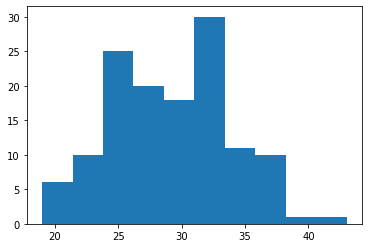

In [122]:
plt.hist(po24[po24.events=='home_run'].launch_angle)

In [123]:
df = pos[pos.player_name == 'Wilson, Weston']
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,85,21,10,4,2.0,6,4,0.286,0.476,0.714,1.190,0.477
1,R,104,29,23,6,0.0,1,5,0.214,0.241,0.214,0.456,0.207


In [124]:
df[df.release_speed>=95][['release_speed','pitch_type','p_throws','events','game_date','inning']]

,release_speed,pitch_type,p_throws,events,game_date,inning
178145,97.1,FF,R,strikeout,2023-09-30,5
178149,97.0,FF,R,NaN,2023-09-30,5
178151,96.7,FF,R,NaN,2023-09-30,5
178259,96.1,FF,R,field_out,2023-09-30,2
181696,95.2,FF,L,NaN,2023-09-05,9
181698,96.5,FF,L,NaN,2023-09-05,9
181702,95.4,FF,L,NaN,2023-09-05,9
184903,95.4,FF,R,NaN,2023-08-11,3
185105,95.0,FF,L,NaN,2023-08-09,4
185107,95.3,FF,L,NaN,2023-08-09,4


In [125]:
ks = pd.concat([pos[pos.player_name == 'Schwarber, Kyle'], nphl[nphl.player_name == 'Schwarber, Kyle']])
ks95 = ks[ks.release_speed >= 95]
df = ks95
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,205,52,30,10,4.0,6.0,16.0,0.222,0.308,0.489,0.797,0.340
1,2016,17,4,4,1,0.0,0.0,0.0,0.250,0.250,0.250,0.500,0.220
2,2017,403,102,44,10,4.0,19.0,39.0,0.120,0.284,0.301,0.586,0.269
3,2018,333,86,51,13,2.0,12.0,23.0,0.178,0.291,0.274,0.565,0.260
4,2019,366,104,70,26,9.0,11.0,21.0,0.286,0.375,0.637,1.012,0.414
5,2020,153,40,23,8,4.0,8.0,9.0,0.250,0.400,0.688,1.088,0.444
6,2021,391,103,57,16,4.0,12.0,34.0,0.176,0.272,0.330,0.602,0.268
7,2022,529,129,66,19,7.0,19.0,44.0,0.174,0.295,0.376,0.671,0.299
8,2023,535,141,72,19,5.0,16.0,53.0,0.153,0.248,0.331,0.579,0.256
9,2024,253,68,35,13,2.0,15.0,18.0,0.260,0.412,0.440,0.852,0.373


In [126]:
ks95.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,events,des
3,field_out,290
12,strikeout,257
13,walk,118
11,single,70
8,home_run,41
0,double,24
6,grounded_into_double_play,10
10,sac_fly,7
2,field_error,4
5,force_out,4


Big 8th inning from Wheeler. <br>
Garrett Stubbs is our lefty bat when we need some insurance in the 9th? He hit a ball pretty well to move Casty to third with 2 outs. <br>
Brandon Marsh can come up to pinch hit.
<br> Probably put Marsh and Rojas into this game.0
<br> Marsh punches out.
<br> Jose in for the 9th.
<br> Bad

In [127]:
pp24[pp24.p_throws == 'L'].groupby('player_name',as_index=False).agg({'pitcher' : 'max'
                                                                      ,'game_pk' : 'nunique'
                                                                     }).sort_values(by='game_pk',ascending=False)

,player_name,pitcher,game_pk
1,"Alvarado, José",621237,45
2,"Soto, Gregory",642397,43
3,"Strahm, Matt",621381,43
4,"Suárez, Ranger",624133,20
5,"Sánchez, Cristopher",650911,20
0,"Allard, Kolby",663465,1


In [128]:
df = ja = pps[pps.pitcher==621237]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2021,1045,246,129,42,5,42,68,0.213,0.370,0.325,0.695,0.322
1,2022,1081,261,138,47,5,25,95,0.204,0.287,0.317,0.605,0.272
2,2023,855,204,114,37,3,19,70,0.202,0.275,0.306,0.581,0.259
3,2024,716,175,113,34,4,16,45,0.217,0.291,0.325,0.616,0.277


Poorly caught 1-2 FC that landed in zone 7. Should have been a punchout.

Alvi just throws two more FCs, the second gets a whiff. 94 and 95. Nasty.

Oneil Cruz now.
<br> 0-0 SI 96, dirt
<br> 1-0 FC 96, other batter's box
<br> 2-0 SI 100, damn. Here it is, hit it.
<br> 2-1 SI 100, chopped up the middle. Sosa has no play at home.

## Game 2: Ortiz vs Sanchez
Offense does nothing Kellen was at a Union game.

## Game 3: Gonzales vs Phillips

In [129]:
mg_id = pos[pos.des.str.contains('Marco Gonzales')].pitcher.unique()[0]
mg = pd.concat([pos[pos.pitcher==mg_id],nphl[nphl.pitcher == mg_id]])
mg

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,source
198590,CH,2023-04-25,78.7,2.43,5.33,"Stott, Bryson",681082,594835,strikeout,swinging_strike,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
198591,FF,2023-04-25,87.4,1.83,5.83,"Stott, Bryson",681082,594835,NaN,foul,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
198592,FF,2023-04-25,88.6,1.93,5.78,"Stott, Bryson",681082,594835,NaN,foul,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
198593,CU,2023-04-25,78.4,2.14,5.44,"Stott, Bryson",681082,594835,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
198594,FC,2023-04-25,84.4,2.15,5.63,"Stott, Bryson",681082,594835,NaN,ball,...,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294123,FF,2015-09-01,89.5,1.39,5.85,"Harper, Bryce",547180,594835,NaN,ball,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
294132,FF,2015-09-01,90.8,1.51,5.92,"Harper, Bryce",547180,594835,walk,ball,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
294134,FF,2015-09-01,91.4,1.66,5.89,"Harper, Bryce",547180,594835,NaN,ball,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
294135,FF,2015-09-01,90.9,1.50,5.91,"Harper, Bryce",547180,594835,NaN,ball,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n


In [130]:
df = mg
res = phils_vs_mg = results('player_name')

In [131]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Stubbs, Garrett'
          ,'Pache, Cristian'
         ]
res[res.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",38,7,6,1.0,0.0,1.0,0.0,0.167,0.286,0.167,0.452,0.225
1,"Castellanos, Nick",53,16,14,6.0,0.0,0.0,2.0,0.375,0.375,0.500,0.875,0.377
5,"Harper, Bryce",27,8,5,1.0,0.0,1.0,2.0,0.167,0.250,0.167,0.417,0.196
9,"Pache, Cristian",33,12,11,6.0,0.0,1.0,0.0,0.545,0.583,0.636,1.220,0.531
13,"Schwarber, Kyle",40,11,6,3.0,1.0,3.0,2.0,0.375,0.545,0.750,1.295,0.536
14,"Sosa, Edmundo",21,7,5,2.0,1.0,0.0,2.0,0.286,0.286,0.857,1.143,0.466
16,"Stubbs, Garrett",13,5,5,1.0,0.0,0.0,0.0,0.200,0.200,0.200,0.400,0.177
17,"Turner, Trea",30,8,6,1.0,0.0,0.0,2.0,0.125,0.125,0.250,0.375,0.158
18,"Wilson, Weston",5,2,1,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000


In [132]:
df = pp24
results('player_name')
tp = pps[pps.player_name == 'Phillips, Tyler']
pitch_mix(tp).round(1)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,ST,Sweeper,113,82.2,2420.2,10.3,35.1
3,SI,Sinker,106,94.0,2111.3,8.3,32.9
2,FF,4-Seam Fastball,44,92.7,2312.0,8.9,13.7
1,CU,Curveball,42,81.1,2563.6,9.5,13.0
0,CH,Changeup,17,86.0,1265.4,11.0,5.3


In [133]:
tp.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                
                     count   mean   std             count     mean    std
0         CH            17  86.01  0.85                17  1265.41  89.44
1         CU            42  81.10  1.14                42  2563.62  62.42
2         FF            44  92.75  0.94                44  2312.02  84.76
3         SI           106  93.96  1.00               106  2111.34  90.74
4         ST           113  82.24  1.01               113  2420.22  81.11

In [134]:
82.56 - 1.03, 82.56 + 1.03

(81.53, 83.59)

In [135]:
2441.63 - 89.69, 2441.63 + 89.69

(2351.94, 2531.32)

In [136]:
94.45 - 0.82, 94.45 + 0.82

(93.63000000000001, 95.27)

In [137]:
2087.73 - 108.26, 2087.73 + 108.26

(1979.47, 2195.9900000000002)

In [138]:
df = bohm
bp = bohm_parks = results('home_team')
bp[bp.home_team == 'PIT']
# Bohm hits well at PNC Park

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
20,PIT,216,61,46,20,2.0,7.0,8.0,0.37,0.443,0.5,0.943,0.413


In [139]:
po = pd.concat([pos[pos.player_name.isin(lineup)],nphl[nphl.player_name.isin(lineup)]])
po

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,source
94303,SI,2019-09-29,97.3,-2.47,5.74,"Harper, Bryce",547180,645261,field_out,hit_into_play,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94304,SI,2019-09-29,97.4,-2.52,5.82,"Harper, Bryce",547180,645261,NaN,ball,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94334,FF,2019-09-29,98.3,-2.28,5.80,"Harper, Bryce",547180,645261,single,hit_into_play,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94335,SI,2019-09-29,97.7,-2.39,5.72,"Harper, Bryce",547180,645261,NaN,called_strike,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94336,SI,2019-09-29,92.1,-2.34,5.74,"Harper, Bryce",547180,645261,NaN,ball,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313396,SL,2015-08-21,84.8,-1.76,6.21,"Turner, Trea",607208,346798,field_out,hit_into_play,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313397,SI,2015-08-21,90.0,-1.70,6.19,"Turner, Trea",607208,346798,NaN,called_strike,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313398,SL,2015-08-21,84.9,-1.81,6.23,"Turner, Trea",607208,346798,field_out,hit_into_play,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313399,SL,2015-08-21,84.5,-1.75,6.34,"Turner, Trea",607208,346798,NaN,swinging_strike,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n


In [140]:
po[po.p_throws == 'L']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,source
94388,CU,2019-09-29,72.1,3.10,3.79,"Harper, Bryce",547180,572383,strikeout,swinging_strike,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94394,CU,2019-09-29,73.4,3.08,3.74,"Harper, Bryce",547180,572383,NaN,swinging_strike,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94396,CU,2019-09-29,72.7,3.30,3.70,"Harper, Bryce",547180,572383,NaN,called_strike,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94404,CU,2019-09-29,73.3,3.23,3.74,"Harper, Bryce",547180,572383,NaN,ball,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
94405,CU,2019-09-29,74.7,3.12,3.79,"Harper, Bryce",547180,572383,NaN,ball,...,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313375,FF,2015-08-28,93.0,3.17,6.05,"Turner, Trea",607208,543045,NaN,called_strike,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313392,CH,2015-08-22,80.6,2.43,5.50,"Turner, Trea",607208,462945,strikeout,swinging_strike_blocked,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313393,CH,2015-08-22,78.3,2.51,5.57,"Turner, Trea",607208,462945,NaN,foul,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n
313394,FF,2015-08-22,89.7,2.61,5.56,"Turner, Trea",607208,462945,NaN,ball,...,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134,n


In [141]:
pitch_mix_by_group(po,'p_throws')

,p_throws,count,release_speed,release_spin_rate,zone,usage
1,R,71107,89.184,2246.096,9.412,71.7
0,L,28123,87.816,2199.297,9.257,28.3


In [142]:
pitch_mix(mg).round(2)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,165,89.36,2133.08,8.37,36.3
0,CH,Changeup,126,80.59,2177.79,11.05,27.7
1,CU,Curveball,88,78.38,2273.44,8.84,19.3
2,FC,Cutter,61,85.73,2100.25,8.82,13.4
4,SI,Sinker,15,89.76,2117.47,6.87,3.3


In [143]:
mg.groupby('pitch_type'
           ,as_index=False
          ).agg({'release_speed' : ['count','mean','std']
                 ,'release_spin_rate' : ['count', 'mean', 'std']
                }).round(2)

pitch_type release_speed              release_spin_rate                 
                     count   mean   std             count     mean     std
0         CH           126  80.59  1.65               126  2177.79  110.34
1         CU            88  78.38  1.69                88  2273.44  140.96
2         FC            61  85.73  1.19                61  2100.25  132.21
3         FF           165  89.36  1.09               165  2133.08  119.28
4         SI            15  89.76  0.71                15  2117.47   49.40

### Tyler Phillips might be legit.

He pitched to contact today, but it was lots of soft contatct. Just three punchouts and the walk, only allowed 4 hits though.

His velo was down pretty much across the board from his first two starts. He was aggressive with the breaking stuff, throwing ST and CU 56% of the time. The average EV on bip against his ST was 71.4 mph, the hardest hit ball was just 81.5 mph off the bat. What a day for his ST! He got 6 whiffs on it, 38% of the swings on that pitch. He also threw it for a called strike 6 times.

.270 xBA for the Buccos, that is the highest of any appearance by Phillips. Well that is probably just based off launch_speedangle.

Ricky Bo comments on Tyler Phillips using both sides of the plate, also on him doing his job.

Pache bunting in the top of the 7th. Nice. He is not able to get it down. How consistently did pitchers drop the bunt? Damn, that is an odyssey. Idk if I am high or not. I wish I felt it more. Kind of a letdown on a Sunday afternoon, huh.

Bad call Doug Eddings. Overturned. Trea Turner comes up with an RBI by punching a breaking ball through the 4/3 hole into RF.

Now Harper gets to bat with one out and runners on the corners. Put this game to bed, Bryce.

Harper vs Nicolas Top 7, 1+3, 1 out
<br> 0-0 90 SL X - Harper pulls the breaking ball into the hole, only play is to first. RBI.

Bohm vs Nicolas Top 7, 2, 2 out
<br> 0-0 91 SL B
<br> 1-0 97 FF B
<br> 2-0 SL X - Bohm pulls the breaking ball through the 5-6 hole, Turner scores.
EV = 90.9 mph, LA = 5 degrees, Dist = 102

Skipping Castelanos at bat

Bottom 7: Strahm and Marte hot in the 'pen. I think you got to have Strahm here. Well it is Marte. Blue fucking socks.

**Tellez vs Marte, Bot 7, 0, 0 out**
<br> 0-0 97 FF B 13 low
<br> 1-0 95 SL S 4
<br> 1-1 98 FF B 
<br> 2-1 85 SL B
<br> 3-1 96 FF S 4 foul
<br> 3-2 98 FF S 13 low but called K
<br> Tellez backwards K on a FF that looked a little low.

**Hayes vs Marte**
<br> 0-0 99 FF B 13 inside
<br> 1-0 87 SL B 13 dirt
<br> 2-0 96 SI S 13 foul tip
<br> 2-1 98 SI B 11 low 
<br> 3-1 98 SI S 13 foul
<br> 3-2 97 SI X 1 single the other way
<br> Hayes battles and muscles a sinker up in the zone out to right, Casty charges but traps it.
<br> EV = 87.8, LA = 19, Dist = 250

**Palacios vs Marte**
<br> 0-0 87 SL B 13
<br> 1-0 85 SL B 13 low
<br> 2-0 98 FF B 14 inside
<br> 3-0 97 FF S 9
<br> 3-1 96 FF X 6 L8
<br> Palacios hits one sharply but Pache has time to run it down. Pache does not know how many outs there are?
<br> EV = 103.5, LA = 14, Dist = 307

**Joe vs Marte**
<br> 0-0 98 SI S 5
<br> 0-1 98 FF B 12 outside\
<br> 1-1 86 SL X 6 F9
<br> Weak fly ball off the end of the bat that Casty charges and gets to.
<br> EV = 71.7, LA = 37, Dist = 233

Top 8

**Sosa vs Fleming**
<br> 0-0 83 CH 7 S foul
<br> 0-1 87 FC 13 S foul
<br> 0-2 83 CH 12 B nowhere close
<br> 1-2 87 FC 4 S foul
<br> 1-2 84 CH 12 B low
<br> 2-2 83 CH 12 X 5-3
<br> Sosa goes after a changeup that fell off the table. Rolls it straight to Ke'Bryan Hayes 
<br> EV = 96.3, LA = 1, Dist = 42 

**Wilson vs Fleming**
<br> 0-0 91 SI 12 B outside
<br> 1-0 91 SI 12 X single to center
<br> Weston Wilson takes a sinker that was off the plate away and just floats it out to CF
<br> EV = 88.4, LA = 13, Dist = 216 

**Stubbs vs Fleming**
<br> 0-0 90 SI 3 S
<br> 0-1 90 SI 9 S foul 
<br> 0-2 90 SI 6 X single to right
<br> Garrett Stubbs puts a nice swing on a sinker and drops it in right field
<br> EV = 69, LA = 22, Dist = 200

**Pache vs Fleming** Can Pache do it?
<br> 0-0 87 FC 11 B inside
<br> 1-0 83 CH 13 B low and in
<br> 2-0 83 CH 14 B well off
<br> 3-0 89 SI 8 X flyout to right center, near the track
<br> Pache swings at a 3-0 sinker and lifts it out to right center, pretty well hit. Moves Wilson who could have scored if he went first to third on the Stubbs single
<br> EV = 100.8, LA = 36, Dist = 363 

**Schwarber vs Fleming**
<br> 0-0 88 FC 13 B well off
<br> 1-0 90 SI 14 B almost hit his dick
<br> 2-0 90 SI 14 B inside
<br> 3-0 91 SI 14 B well in
<br> Schwarber four pitch walk. I mean, great at bat but Fleming was not super close. Composure from 12.

**Turner vs Fleming** Bases loaded, 2 outs.
<br> 0-0 83 CH 13 S Turner thought it was high
<br> 0-1 82 CH 14 B in the other batters box
<br> 1-1 83 CH 9 S foul
<br> 1-2 83 CH 14 B in the dirt, was always below the zone.
<br> 2-2 83 CH 14 S man that was just a good pitch, off the plate but 7 had to swing
<br> 2-2 84 CH 14 B in the dirt, good take
<br> 3-2 83 CH 8 X 5-3
<br> Hit hard but right at Ke'Bryan Hayes who makes a nice play.
EV = 92.8, LA = 4, Dist = 83

Bot 8: Here comes Jose.

**Bart vs Alvarado**
<br> 0-0 96 SI 3 S
<br> 0-1 97 SI 4 X single through the 5-6 hole
<br> Bart pulls a sinker that caught too much of the plate past a diving Turner.
<br> EV = 111, LA = 4, Dist = 95 

**McCutchen vs Alvarado**
<br> 0-0 97 SI 11 B nearly hits Cutch in the face
<br> 1-0 97 SI 1 S whiff
<br> 1-1 98 SI 1 S whiff
<br> 1-2 98 SI 1 X P5
<br> McCutchen skies one, caught at the net by Bohm in foul territory.
<br> EV = 93.9, LA = 70, Dist = 117

**Reynolds vs Alavarado**
<br> 0-0 93 FC 7 S
<br> 0-1 99 SI 1 S
<br> 0-2 94 FC 1 S whiff
<br> Strike one, Strike two, Good Luck! Nasty stuff from Jose.

**Cruz vs Alvarado**
<br> 0-0 99 SI 7 S foul
<br> 0-1 99 SI 3 B just inside
<br> 1-1 94 FC 13 S whiff
<br> 1-2 93 FC 11 B outside
<br> 2-2 94 FC 13 S whiff, in the dirt
<br> Nice pitching from Jose, nasty FCs after establishing the fastball early.

Top 9:

**Harper vs Fleming**
<br> 0-0 77 CU 8 S whiff
<br> 0-1 90 SI 9 X 3U
<br> Harper rolls over a sinker below the zone
<br> EV = 75.4, LA = -29, Dist = 5

**Bohm vs Fleming** 
<br> 0-0 87 FC 14 B dirt
<br> 1-0 83 CH 9 S
<br> 1-1 79 CU 11 B dirt 
<br> 2-1 87 FC 1 S foul
<br> 2-2 76 CU 9 X F7
<br> Bohm pulls a backdoor curveball out to left center but playable for Reynolds
<br> EV = 97.2, LA = 38, Dist = 366

**Castellanos vs Fleming**
<br> 0-0 84 CH 14 B low
<br> 1-0 83 CH 14 S foul
<br> 1-1 76 CU 9 S foul
<br> 1-2 84 CH 9 S foul
<br> 1-2 76 CU 8 X home run
<br> Nick Castellanos goes down and pulls that breaking ball over the left field fence. It's always a homer.
<br> EV = 104.3, LA = 34, Dist = 409

**Sosa vs Fleming**
<br> 0-0 84 CH 14 X E6
<br> Sosa pulls one out to Cruz who boots it.
<br> EV = 96.4, LA = -6, Dist = 14

**Wilson vs Fleming**
<br> 0-0 89 SI 14 B outside
<br> 1-0 84 CH 14 X 6-4
<br> Wilson rolls a changeup out to Cruz who flips to second
<br> EV = 65.5, LA = -21, Dist = 6



Bot 9: Here comes Jose Ruiz!

**Gonzales vs Ruiz**
<br> 0-0 96 SI 4 X 6-3
<br> Gonzales bounces the first pitch out to Turner
<br> EV = 90.7, LA = -18, Dist = 8

**Tellez vs Ruiz**
<br> 0-0 97 FF 2 S
<br> 0-1 93 FF 14 B nowhere close
<br> 1-1 87 CU 8 S foul
<br> 1-2 87 CU 14 X P6
<br> Tellez chases a curveball and hits it off the floor. Spinner that Turner runs out onto the grass to snag.
<br> EV = 67.3, LA = 37, Dist = 204

**Hayes vs Ruiz**
<br> 0-0 97 FF 11 B low and in
<br> 1-0 96 SI 4 X L6
<br> Hayes hits one hard but Turner is able to make a leaping catch.
<br> EV = 97.4, LA = 9, Dist = 197

# I did some silly charting for the last three innings of this one.

# How many curveballs did Aaron Nola throw at the top of the zone?
Not very many, especially this year. He has only given up one hit on them so far.

In [144]:
df = nola[(nola.pitch_type.isin(['KC','CU']))
          &(nola.zone.isin([1,2,3,11,12]))
         ]
x = results('game_year')

In [145]:
y = pitch_mix_by_group(nola,'game_year').sort_values(by='game_year',ascending=False)

In [146]:
z = x.merge(y,on='game_year',suffixes = ('_x','_y'))
z['share'] = z.pitches/z['count']
z[['game_year','pitches','count','share']]

,game_year,pitches,count,share
0,2015,42,1117,0.037601
1,2016,70,1796,0.038976
2,2017,89,2665,0.033396
3,2018,116,3212,0.036115
4,2019,138,3332,0.041417
5,2020,28,1148,0.024390
6,2021,70,2971,0.023561
7,2022,71,3459,0.020526
8,2023,69,3431,0.020111
9,2024,27,2011,0.013426


# Could Taijuan Walker throw more front hip sinkers?
Holy shit, yeah.
<br> He has thrown 16 this season, all have been called strikes. 6 of them have been for a backwards K.

In [147]:
tai = pp24[pp24.player_name == 'Walker, Taijuan']
fhs = tai[(tai.pitch_type == 'SI')
          &(tai.stand == 'L')
          &(tai.zone.isin([3,6,9]))
         ]
df = fhs
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2024,16,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0


# Max EV
Schwarber single off of Bobby Miller on 7/9 - 115.6 mph
<br> Schwarber home run off of Sale on third game of year, 114.4 mph.

In [148]:
po24.sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

,game_date,player_name,launch_speed,events
206274,2024-07-09,"Schwarber, Kyle",115.6,single
217933,2024-04-10,"Schwarber, Kyle",115.2,single
218181,2024-04-09,"Schwarber, Kyle",115.1,NaN
207929,2024-06-26,"Schwarber, Kyle",114.8,NaN
212768,2024-05-17,"Schwarber, Kyle",114.6,NaN
...,...,...,...,...
219610,2024-03-29,"Castellanos, Nick",NaN,NaN
219612,2024-03-29,"Turner, Trea",NaN,NaN
219613,2024-03-29,"Schwarber, Kyle",NaN,NaN
219616,2024-03-29,"Harper, Bryce",NaN,NaN


In [149]:
po24[po24.events=='home_run'].sort_values(by='launch_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

,game_date,player_name,launch_speed,events
219330,2024-03-31,"Schwarber, Kyle",114.4,home_run
205008,2024-07-22,"Harper, Bryce",113.8,home_run
210272,2024-06-08,"Castellanos, Nick",113.1,home_run
218782,2024-04-03,"Schwarber, Kyle",113.0,home_run
209992,2024-06-11,"Schwarber, Kyle",112.4,home_run
...,...,...,...,...
214169,2024-05-07,"Harper, Bryce",95.4,home_run
216813,2024-04-19,"Merrifield, Whit",95.3,home_run
205586,2024-07-14,"Turner, Trea",95.2,home_run
208993,2024-06-17,"Bohm, Alec",95.2,home_run


# Max Pitch Velo

In [150]:
pp24['velo'] = pp24.release_speed.fillna(0)
pp24.sort_values(by='velo',ascending=False)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,runSB,runCS,R/PA,R/W,cFIP,group,date,month,my,velo
218283,SI,2024-03-29,101.0,1.24,6.71,"Alvarado, José",671739,621237,NaN,foul,...,0.2,-0.405,0.117,9.674,3.168,"Alvarado, José - SI",2024-03-29,3,2024-3,101.0
218074,SI,2024-03-30,100.8,2.19,5.86,"Soto, Gregory",621566,642397,NaN,foul,...,0.2,-0.405,0.117,9.674,3.168,"Soto, Gregory - SI",2024-03-30,3,2024-3,100.8
216152,SI,2024-04-13,100.5,2.24,5.74,"Soto, Gregory",665833,642397,NaN,called_strike,...,0.2,-0.405,0.117,9.674,3.168,"Soto, Gregory - SI",2024-04-13,4,2024-4,100.5
218229,SI,2024-03-29,100.5,1.22,6.63,"Alvarado, José",606115,621237,NaN,ball,...,0.2,-0.405,0.117,9.674,3.168,"Alvarado, José - SI",2024-03-29,3,2024-3,100.5
218277,SI,2024-03-29,100.5,1.29,6.66,"Alvarado, José",671739,621237,single,hit_into_play,...,0.2,-0.405,0.117,9.674,3.168,"Alvarado, José - SI",2024-03-29,3,2024-3,100.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204648,EP,2024-07-14,37.8,-1.26,6.61,"Stubbs, Garrett",668832,596117,NaN,called_strike,...,0.2,-0.405,0.117,9.674,3.168,"Stubbs, Garrett - EP",2024-07-14,7,2024-7,37.8
204640,EP,2024-07-14,35.9,-0.93,6.59,"Stubbs, Garrett",669127,596117,NaN,blocked_ball,...,0.2,-0.405,0.117,9.674,3.168,"Stubbs, Garrett - EP",2024-07-14,7,2024-7,35.9
204660,EP,2024-07-14,35.6,-1.06,6.80,"Stubbs, Garrett",668709,596117,NaN,ball,...,0.2,-0.405,0.117,9.674,3.168,"Stubbs, Garrett - EP",2024-07-14,7,2024-7,35.6
204643,EP,2024-07-14,35.6,-0.99,6.63,"Stubbs, Garrett",668832,596117,single,hit_into_play,...,0.2,-0.405,0.117,9.674,3.168,"Stubbs, Garrett - EP",2024-07-14,7,2024-7,35.6


In [151]:
pp24[pp24.events=='strikeout'].sort_values(by='release_speed',ascending=False)[['game_date','player_name','launch_speed','events']]

,game_date,player_name,launch_speed,events
218219,2024-03-29,"Alvarado, José",NaN,strikeout
205084,2024-07-11,"Alvarado, José",NaN,strikeout
212884,2024-05-08,"Domínguez, Seranthony",NaN,strikeout
216842,2024-04-08,"Soto, Gregory",NaN,strikeout
213763,2024-05-01,"Soto, Gregory",NaN,strikeout
...,...,...,...,...
204920,2024-07-12,"Suárez, Ranger",NaN,strikeout
211269,2024-05-21,"Suárez, Ranger",NaN,strikeout
214985,2024-04-22,"Suárez, Ranger",NaN,strikeout
212662,2024-05-10,"Suárez, Ranger",NaN,strikeout


# Max xBA on out
Pache long running catch on Jesus Sanchez in Miami on Mother's Day
<br> Or Brandon Marsh charging in on a sinking liner off the bat of Freddie Freeman.

In [152]:
pp24[(pp24.type=='X')
     &(~pp24.events.isin(['single','double','triple','home_run']))
    ].sort_values(by='estimated_ba_using_speedangle',ascending=False
                 )[['hit_location','pitch_type','launch_speed','launch_angle','hit_distance_sc'
                   ,'estimated_ba_using_speedangle','events','game_date','player_name']]

,hit_location,pitch_type,launch_speed,launch_angle,hit_distance_sc,estimated_ba_using_speedangle,events,game_date,player_name
204375,9.0,KC,86.4,17.0,274.0,0.957,sac_fly,2024-07-19,"Nola, Aaron"
212476,8.0,FF,105.0,28.0,383.0,0.934,field_out,2024-05-12,"Kerkering, Orion"
205214,8.0,FC,102.7,13.0,295.0,0.934,field_out,2024-07-10,"Alvarado, José"
212316,4.0,ST,99.4,12.0,181.0,0.931,field_out,2024-05-13,"Kerkering, Orion"
212118,7.0,KC,95.2,14.0,282.0,0.926,field_out,2024-05-14,"Nola, Aaron"
...,...,...,...,...,...,...,...,...,...
208901,9.0,FC,NaN,NaN,NaN,NaN,field_out,2024-06-09,"Walker, Taijuan"
208986,3.0,SL,NaN,NaN,NaN,NaN,field_out,2024-06-09,"Hoffman, Jeff"
209172,9.0,SL,NaN,NaN,NaN,NaN,field_out,2024-06-08,"Ruiz, José"
209548,6.0,NaN,NaN,NaN,NaN,NaN,field_out,2024-06-03,"Wheeler, Zack"


# Jose Alvarado L-R Splits

In [153]:
df = ja[ja.game_year==2024]
results('stand')

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,191,52,36,5,1,4,12,0.104,0.173,0.188,0.361,0.168
1,R,525,123,77,29,3,12,33,0.266,0.341,0.385,0.727,0.323


Alvarado and Strahm are going to swap roles. <br>
Strahm is not just a funky lefty, he is a legit closer. <br>
Remember when Ranger was a shutdown closer? Is that a radical play? <br>
<br>ZW
<br>AN
<br>CS - Sanchez also bad in his one postseason start but he got unlucky. That game was lost by Craig Kimbrel.
<br>Rob does not let Ranger take the Braves for the third time through the order in the NLDS but does in the NLCS. Game 7 failure by Ranger.

As Gabe Kapler says, "He's presenting beautifully."

In [154]:
# This is the first time Bryce Harper has ever played in this ballpark.
# Bryce Harper just hit a home run in his first ever at bat at Target Field.
# Nick Castellanos will have played here a lot.
df = po24
res24 = results('player_name')

In [155]:
h = hist24 = pd.DataFrame()
for pn in df.player_name.unique().tolist():
    x = pd.concat(
        [df[(df.player_name == pn)
           &(df.home_team == 'MIN')
          ]
         ,nphl[(nphl.player_name == pn)
               &(nphl.home_team == 'MIN')
              ]
        ]
    )
    h =  pd.concat([h,x])
    print(pn)
h

Marsh, Brandon
Bohm, Alec
Harper, Bryce
Turner, Trea
Schwarber, Kyle
Hays, Austin
Stott, Bryson
Castellanos, Nick
Realmuto, J.T.
Stubbs, Garrett
Wilson, Weston
Sosa, Edmundo
Rojas, Johan
Pache, Cristian
Marchán, Rafael
Merrifield, Whit
Clemens, Kody
Dahl, David


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHR,runSB,runCS,R/PA,R/W,cFIP,date,month,my,source
204633,FF,2024-07-24,95.4,-1.85,6.44,"Marsh, Brandon",669016,701581,field_out,hit_into_play,...,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7.0,2024-7,NaN
204690,FC,2024-07-24,94.7,-1.83,5.36,"Marsh, Brandon",669016,592779,force_out,hit_into_play,...,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7.0,2024-7,NaN
204696,FC,2024-07-24,94.2,-1.96,5.42,"Marsh, Brandon",669016,592779,NaN,ball,...,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7.0,2024-7,NaN
204704,FF,2024-07-24,97.1,-1.78,6.30,"Marsh, Brandon",669016,701581,strikeout,called_strike,...,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7.0,2024-7,NaN
204707,FF,2024-07-24,96.2,-1.83,6.36,"Marsh, Brandon",669016,701581,NaN,foul,...,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7.0,2024-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69477,SL,2021-05-03,86.7,1.75,6.30,"Dahl, David",621311,663399,NaN,ball,...,2.007,0.2,-0.419,0.121,9.973,3.170,NaT,NaN,NaN,n
69478,SL,2021-05-03,86.3,1.84,6.28,"Dahl, David",621311,663399,NaN,foul,...,2.007,0.2,-0.419,0.121,9.973,3.170,NaT,NaN,NaN,n
69479,FF,2021-05-03,93.8,1.81,6.26,"Dahl, David",621311,663399,NaN,ball,...,2.007,0.2,-0.419,0.121,9.973,3.170,NaT,NaN,NaN,n
69480,SL,2021-05-03,86.0,1.78,6.30,"Dahl, David",621311,663399,NaN,swinging_strike,...,2.007,0.2,-0.419,0.121,9.973,3.170,NaT,NaN,NaN,n


In [156]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
         ]
df = h
tgt_field = results('player_name')
tgt_field[tgt_field.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",45,12,8,3.0,0.0,2.0,2.0,0.300,0.417,0.500,0.917,0.399
1,"Castellanos, Nick",677,176,133,45.0,7.0,11.0,32.0,0.278,0.318,0.500,0.818,0.343
4,"Harper, Bryce",52,13,10,2.0,1.0,0.0,3.0,0.154,0.154,0.462,0.615,0.256
8,"Realmuto, J.T.",89,22,17,6.0,0.0,2.0,2.0,0.316,0.409,0.368,0.778,0.352
9,"Rojas, Johan",29,8,5,1.0,0.0,1.0,2.0,0.167,0.250,0.167,0.417,0.197
10,"Schwarber, Kyle",105,26,12,3.0,0.0,1.0,12.0,0.125,0.154,0.125,0.279,0.128
11,"Stott, Bryson",43,11,9,2.0,0.0,0.0,2.0,0.182,0.182,0.182,0.364,0.161
13,"Turner, Trea",150,38,30,9.0,2.0,4.0,4.0,0.273,0.342,0.485,0.827,0.349
14,"Wilson, Weston",18,4,3,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000


In [157]:
h[h.player_name=='Turner, Trea'].groupby('away_team',as_index=False).agg({'des' : 'count'})

,away_team,des
0,LAD,32
1,PHI,47
2,WSH,71


In [158]:
bo_id = nphl[nphl.des.str.contains('Ober')].pitcher.unique()#[0]
#bo_id.
nphl[nphl.des.str.contains('Ober')].groupby(['player_name','home_team','away_team'
              ,'pitcher','batter'],as_index=False).agg({'des' : 'max'})

,player_name,home_team,away_team,pitcher,batter,des
0,"Anderson, Chase",MIL,PHI,502624,519085,Brett Oberholtzer strikes out swinging.
1,"Segura, Jean",SEA,COL,623184,516416,"Jean Segura grounds into a double play, pitche..."


# MIN (A) 722-724
## Game 1: Ober vs Suarez

## Game 2: Woods Richardson vs Wheeler

In [159]:
# Dude this Jhoan Duran has crazy stuff but cannot find the zone.

In [160]:
# How about that.

In [161]:
# Bohm made a nice play to get out of a jam in the 8th. Hoffman and Soto.

In [162]:
df = po24[po24.launch_speed >= 100]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",101,95.0,95.0,52.0,9.0,0.0,0.0,0.547,0.547,1.063,1.611,0.683
1,"Castellanos, Nick",76,68.0,68.0,39.0,12.0,0.0,0.0,0.574,0.574,1.265,1.838,0.776
2,"Clemens, Kody",12,10.0,10.0,9.0,3.0,0.0,0.0,0.900,0.900,2.100,3.000,1.259
3,"Dahl, David",4,4.0,4.0,4.0,2.0,0.0,0.0,1.000,1.000,2.750,3.750,1.568
4,"Harper, Bryce",91,86.0,86.0,50.0,19.0,0.0,0.0,0.581,0.581,1.407,1.988,0.836
5,"Hays, Austin",1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,"Marchán, Rafael",5,5.0,5.0,5.0,3.0,0.0,0.0,1.000,1.000,3.000,4.000,1.666
7,"Marsh, Brandon",57,49.0,49.0,30.0,9.0,0.0,0.0,0.638,0.612,1.404,2.017,0.826
8,"Merrifield, Whit",5,5.0,5.0,3.0,2.0,0.0,0.0,0.600,0.600,1.800,2.400,1.002
9,"Pache, Cristian",20,18.0,18.0,9.0,0.0,0.0,0.0,0.500,0.500,0.611,1.111,0.484


In [163]:
df[df.player_name == 'Stubbs, Garrett']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,date,month,my
204728,FC,2024-07-24,89.7,-2.60,5.95,"Stubbs, Garrett",596117,663485,NaN,foul,...,1.599,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-24,7,2024-7
205519,FF,2024-07-14,90.8,-2.12,5.90,"Stubbs, Garrett",596117,683155,NaN,foul,...,1.599,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-14,7,2024-7
205780,SI,2024-07-13,91.9,1.33,5.88,"Stubbs, Garrett",596117,518397,NaN,foul,...,1.599,2.062,0.2,-0.405,0.117,9.674,3.168,2024-07-13,7,2024-7
209588,SL,2024-06-13,83.2,-2.37,5.42,"Stubbs, Garrett",596117,656557,NaN,foul,...,1.599,2.062,0.2,-0.405,0.117,9.674,3.168,2024-06-13,6,2024-6
216142,FF,2024-04-24,93.9,-1.37,5.77,"Stubbs, Garrett",596117,608371,NaN,foul,...,1.599,2.062,0.2,-0.405,0.117,9.674,3.168,2024-04-24,4,2024-4


## Game 3: Okert vs Nola
I guess Soto blew this game in the 9th?
Let us try to find out.

In [164]:
game = pps[pps.game_date == '2024-07-24']
game.groupby(['player_name'
              ,'pitcher'
              ,'inning'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'at_bat_number' : 'nunique'
                   ,'release_speed' : 'mean'
                   ,'release_spin_rate' : 'mean'
                   ,'launch_speed' : 'sum'
                   ,'hit_distance_sc' : 'sum'
                  }).sort_values(by='inning').round(1)

,player_name,pitcher,inning,des,at_bat_number,release_speed,release_spin_rate,launch_speed,hit_distance_sc
2,"Nola, Aaron",605400,1,9,4,85.5,2423.0,338.0,672.0
3,"Nola, Aaron",605400,2,10,4,87.6,2364.3,362.5,1242.0
4,"Nola, Aaron",605400,3,13,3,83.2,2532.2,275.9,496.0
5,"Nola, Aaron",605400,4,26,5,87.3,2332.6,580.8,936.0
6,"Nola, Aaron",605400,5,9,4,86.7,1987.7,336.5,259.0
7,"Nola, Aaron",605400,6,31,6,87.2,2405.5,568.7,852.0
1,"Kerkering, Orion",689147,7,22,4,91.2,2592.8,417.7,761.0
9,"Strahm, Matt",621381,7,9,3,90.7,2462.7,286.3,630.0
0,"Hoffman, Jeff",656546,8,21,4,92.3,2341.5,695.8,1236.0
8,"Soto, Gregory",642397,9,12,3,91.6,2333.9,180.6,170.0


# CLE (H) 726-728
## Game 1: Lively vs Sanchez
Fun night at the ballpark with my older brother Peter. Great seats bought by Pete. We had a nice conversation. Phillies lost. <br>

## Game 2: Carrasco vs Phillips
Phillips CGSO. Stud. I was at the Union vs Charlotte FC Leagues Cup game with Pete and Seana. <br>

## Game 3: Cantillo vs Allard

# NYY (H) 729-731
## Game 1: Gil vs Wheeler
Wheeler gets hit hard and the PHils drop game 1.

## Game 2: Wilson vs Nola
Phils blow it in extras.

## Game 3: Cortes vs Sanchez
Bad. Bad. Bad.